In [1]:
# Call the relevant python packages
import numpy as np
import pandas as pd
import glob, os                          # Operating system module and pathnames

import matplotlib
#matplotlib.use('nbagg')
import matplotlib.pyplot as plt

from astropy import units as u
from astropy.io import ascii, fits
from astropy.table import join, hstack, Table, Column, vstack
from astropy.coordinates import Angle, Latitude, Longitude, SkyCoord


# Set colour palette & plot layouts
import seaborn as sns     #; sns.set()
sns.set_context("paper")   # "paper", "notebook", "talk", "poster"

# Output plots in Notebook
#%matplotlib notebook
%matplotlib inline

# Table Setup

In [2]:
# Read in the catalogue

file = 'NGC6822_Full_Statistics.csv'
data = ascii.read(file, data_start=1)

err=0.2 #maximum allowed errors for sources to be considered
mod=4.29 #difference in distance moduli between SMC and NGC 6822

#create indices for any sensible sources that meet the numbered conditions
c1_idx=np.where(data['c1']>0)
c2_idx=np.where(data['c2']>0)
c3_idx=np.where(data['c3']>0)
c4_idx=np.where(data['c4']>0)
c5_idx=np.where(data['c5']>0)
c6_idx=np.where(data['c6']>0)
c7_idx=np.where(data['c7']>0)
c8_idx=np.where(data['c8']>0)
c9_idx=np.where(data['c9']>0)
c11_idx=np.where(data['c11']>0)

#create columns for all stars having met the conditions
data['c2 met?']=0
data['c3 met?']=0
data['c4 met?']=0
data['c5 met?']=0
data['c6 met?']=0
data['c9 met?']=0
data['c11 met?']=0
data['sp rel?']=0
data['HJK rel?']=0
data['YSO Score']=0
data['24 without 58/80']=0
#data['YSO Score HJK']=0

def write_column(table,crit,name):
    print("Number of stars in cut "+name+": {}".format(len(crit[0])))
    for i in range(len(crit[0])):
        #writes '1' to cell where condition is met
        #'0' is the default
        data[name][crit[0][i]]=1

def write_column_append(crit,name):
    print("Number of stars in cut "+name+": {}".format(len(crit[0])))
    for i in range(len(crit[0])):
        #adds '1' to cell where condition is met
        data[name][crit[0][i]]+=1


write_column(data,c2_idx,'c2 met?')
write_column(data,c3_idx,'c3 met?')
write_column(data,c4_idx,'c4 met?')
write_column(data,c5_idx,'c5 met?')
write_column(data,c6_idx,'c6 met?')
write_column(data,c9_idx,'c9 met?')
write_column(data,c11_idx,'c11 met?')

Number of stars in cut c2 met?: 809
Number of stars in cut c3 met?: 886
Number of stars in cut c4 met?: 898
Number of stars in cut c5 met?: 912
Number of stars in cut c6 met?: 654
Number of stars in cut c9 met?: 643
Number of stars in cut c11 met?: 2186


In [3]:
#print column names
data.colnames

['ID',
 'RA',
 'Dec',
 'k36mag',
 'e36mag',
 'd36mag',
 'k45mag',
 'e45mag',
 'd45mag',
 'k58mag',
 'e58mag',
 'd58mag',
 'k80mag',
 'e80mag',
 'd80mag',
 'k24mag',
 'e24mag',
 'dstArcSec',
 'RAJ2000',
 'DEJ2000',
 'Jmag',
 'eJmag',
 'Hmag',
 'eHmag',
 'Kmag',
 'eKmag',
 'c1a',
 'c1b',
 'c1c',
 'c2a',
 'c2b',
 'c2c',
 'c3a',
 'c3b',
 'c3c',
 'c4a',
 'c4b',
 'c4c',
 'c5a',
 'c5b',
 'c5c',
 'c6a',
 'c6b',
 'c6c',
 'c7',
 'c8',
 'c9a',
 'c9b',
 'c9c',
 'c11b',
 'c11c',
 'c1',
 'c2',
 'c3',
 'c4',
 'c5',
 'c6',
 'c9',
 'c10',
 'c11',
 '24 data?',
 '36 data?',
 '45 data?',
 '58 data?',
 '80 data?',
 'SpNum',
 'H data?',
 'J data?',
 'K data?',
 'HJKNum',
 'c2 met?',
 'c3 met?',
 'c4 met?',
 'c5 met?',
 'c6 met?',
 'c9 met?',
 'c11 met?',
 'sp rel?',
 'HJK rel?',
 'YSO Score',
 '24 without 58/80']

# Reliability Tests

In [4]:
#Create indices to be used for CMDs. These will contain sources which are not
#upper limits in any of the relevant filters in the entire <data> catalogue


CMD3658_idx = ((data['k36mag'] > 0.0) & (data['e36mag'] < err) & (data['e36mag'] > 0.0)&(data['k58mag'] > 0.0) & (data['e58mag'] < err) & (data['e58mag'] > 0.0)) 
CMD3658_cat = data[CMD3658_idx]
idx_3658=np.where(CMD3658_idx)
print("Number of stars with good 36/58 data: {}".format(len(idx_3658[0])))

CMD4558_idx = ((data['k45mag'] > 0.0) & (data['e45mag'] < err) & (data['e45mag'] > 0.0)&(data['k58mag'] > 0.0) & (data['e58mag'] < err) & (data['e58mag'] > 0.0)) 
CMD4558_cat = data[CMD4558_idx]
idx_4558=np.where(CMD4558_idx)
print("Number of stars with good 45/58 data: {}".format(len(idx_4558[0])))

CMD4580_idx = ((data['k45mag'] > 0.0) & (data['e45mag'] < err) & (data['e45mag'] > 0.0)&(data['k80mag'] > 0.0) & (data['e80mag'] < err) & (data['e80mag'] > 0.0)) 
CMD4580_cat = data[CMD4580_idx]
idx_4580=np.where(CMD4580_idx)
print("Number of stars with good 45/80 data: {}".format(len(idx_4580[0])))

CMD4524_idx = ((data['k45mag'] > 0.0) & (data['e45mag'] < err) & (data['e45mag'] > 0.0)&(data['k24mag'] > 0.0) & (data['e24mag'] < err) & (data['e24mag'] > 0.0)) 
CMD4524_cat = data[CMD4524_idx]
idx_4524=np.where(CMD4524_idx)
print("Number of stars with good 45/24 data: {}".format(len(idx_4524[0])))

CMD8024_idx = ((data['k80mag'] > 0.0) & (data['e80mag'] < err) & (data['e80mag'] > 0.0)&(data['k24mag'] > 0.0) & (data['e24mag'] < err) & (data['e24mag'] > 0.0)) 
CMD8024_cat = data[CMD8024_idx]
idx_8024=np.where(CMD8024_idx)
print("Number of stars with good 80/24 data: {}".format(len(idx_8024[0])))

CMD3645_idx = ((data['k36mag'] > 0.0) & (data['e36mag'] < err) & (data['e36mag'] > 0.0)&(data['k45mag'] > 0.0) & (data['e45mag'] < err) & (data['e45mag'] > 0.0)) 
CMD3645_cat = data[CMD3645_idx]
idx_3645=np.where(CMD3645_idx)
print("Number of stars with good 36/45 data: {}".format(len(idx_3645[0])))

CMD3680_idx = ((data['k36mag'] > 0.0) & (data['e36mag'] < err) & (data['e36mag'] > 0.0)&(data['k80mag'] > 0.0) & (data['e80mag'] < err) & (data['e80mag'] > 0.0)) 
CMD3680_cat = data[CMD3680_idx]
idx_3680=np.where(CMD3680_idx)
print("Number of stars with good 36/80 data: {}".format(len(idx_3680[0])))

CCDHKK45_idx = ((data['Hmag'] > 0.0) & (data['eHmag'] < err) & (data['eHmag'] > 0.0)&(data['Kmag'] > 0.0) & (data['eKmag'] < err) & (data['eKmag'] > 0.0)&(data['k45mag'] > 0.0) & (data['e45mag'] < err) & (data['e45mag'] > 0.0)) 
CCDHKK45_cat = data[CCDHKK45_idx]
idx_HKK45=np.where(CCDHKK45_idx)
print("Number of stars with good H/K/45 data: {}".format(len(idx_HKK45[0])))

CCDJKJ45_idx = ((data['Jmag'] > 0.0) & (data['eJmag'] < err) & (data['eJmag'] > 0.0)&(data['Kmag'] > 0.0) & (data['eKmag'] < err) & (data['eKmag'] > 0.0)&(data['k45mag'] > 0.0) & (data['e45mag'] < err) & (data['e45mag'] > 0.0)) 
CCDJKJ45_cat = data[CCDJKJ45_idx]
idx_JKJ45=np.where(CCDJKJ45_idx)
print("Number of stars with good J/K/45 data: {}".format(len(idx_JKJ45[0])))

CCDJHH45_idx = ((data['Jmag'] > 0.0) & (data['eJmag'] < err) & (data['eJmag'] > 0.0)&(data['Hmag'] > 0.0) & (data['eHmag'] < err) & (data['eHmag'] > 0.0)&(data['k45mag'] > 0.0) & (data['e45mag'] < err) & (data['e45mag'] > 0.0)) 
CCDJHH45_cat = data[CCDJHH45_idx]
idx_JHH45=np.where(CCDJHH45_idx)
print("Number of stars with good J/H/45 data: {}".format(len(idx_JHH45[0])))

CCDK363645_idx = ((data['Kmag'] > 0.0) & (data['eKmag'] < err) & (data['eKmag'] > 0.0)&(data['k36mag'] > 0.0) & (data['e36mag'] < err) & (data['e36mag'] > 0.0)&(data['k45mag'] > 0.0) & (data['e45mag'] < err) & (data['e45mag'] > 0.0)) 
CCDK363645_cat = data[CCDK363645_idx]
idx_K363645=np.where(CCDK363645_idx)
print("Number of stars with good K/36/45 data: {}".format(len(idx_K363645[0])))

CCD36454558_idx = ((data['k36mag'] > 0.0) & (data['e36mag'] < err) & (data['e36mag'] > 0.0)&(data['k58mag'] > 0.0) & (data['e58mag'] < err) & (data['e58mag'] > 0.0)&(data['k45mag'] > 0.0) & (data['e45mag'] < err) & (data['e45mag'] > 0.0)) 
CCD36454558_cat = data[CCD36454558_idx]
idx_36454558=np.where(CCD36454558_idx)
print("Number of stars with good 36/45/58 data: {}".format(len(idx_36454558[0])))

CCDHK3645_idx = ((data['k36mag'] > 0.0) & (data['e36mag'] < err) & (data['e36mag'] > 0.0)&(data['k45mag'] > 0.0) & (data['e45mag'] < err) & (data['e45mag'] > 0.0)&(data['Hmag'] > 0.0) & (data['eHmag'] < err) & (data['eHmag'] > 0.0)&(data['Kmag'] > 0.0) & (data['eKmag'] < err) & (data['eKmag'] > 0.0)) 
CCDHK3645_cat = data[CCDHK3645_idx]
idx_HK3645=np.where(CCDHK3645_idx)
print("Number of stars with good H/K/36/45 data: {}".format(len(idx_HK3645[0])))

Number of stars with good 36/58 data: 17504
Number of stars with good 45/58 data: 16919
Number of stars with good 45/80 data: 12986
Number of stars with good 45/24 data: 4052
Number of stars with good 80/24 data: 2710
Number of stars with good 36/45 data: 27510
Number of stars with good 36/80 data: 13464
Number of stars with good H/K/45 data: 13484
Number of stars with good J/K/45 data: 12898
Number of stars with good J/H/45 data: 13171
Number of stars with good K/36/45 data: 13654
Number of stars with good 36/45/58 data: 16795
Number of stars with good H/K/36/45 data: 13459


In [5]:
# Create catalogues of reliable sources
#reliable Spitzer is 3,4 or 5 out of 5
#reliable HJK is 2,3 out of 3

reliable_sp_idx=((data['SpNum']>=3))
reliable_sp_cat=data[reliable_sp_idx]
rel_sp_total=len(np.where(reliable_sp_idx)[0])
# write a column containing 1 if the source is reliable in Spitzer terms
write_column(data,np.where(reliable_sp_idx),'sp rel?')

#selects reliable spitzer sources
idx_sp_rel=np.where(data['sp rel?']==1)




reliable_HJK_idx=((data['HJKNum']>=2) & (data['45 data?']==1) & (data['36 data?']==1))
reliable_HJK_cat=data[reliable_HJK_idx]
# write a column containing 1 if the source is reliable in HJK terms
write_column(data,np.where(reliable_HJK_idx),'HJK rel?')

#selects reliable HJK sources
idx_HJK_rel=np.where(data['HJK rel?']==1)



reliable_idx=((data['SpNum']>=3)|((data['HJKNum']>=2) & (data['45 data?']==1) & (data['36 data?']==1)))
reliable_cat=data[reliable_idx]
reliable_total=len(np.where(reliable_idx)[0])
print("There are "+str(reliable_total)+" total reliable stars from either of these catalogues")
idx_reliable=np.where((reliable_cat['sp rel?']==1) | (reliable_cat['HJK rel?']==1))

Number of stars in cut sp rel?: 20999
Number of stars in cut HJK rel?: 14006
There are 23908 total reliable stars from either of these catalogues


In [6]:
#YSO Score
#apply this to reliable_cat ==> have already filtered out upper limits and those with not
#enough Spitzer/HJK data. NB: this catalogue accepts a source if it is in either the
#good Spitzer or the good HJK

reliable_cat['YSO Score'][idx_reliable]=reliable_cat['c2 met?'][idx_reliable]+reliable_cat['c3 met?'][idx_reliable]+reliable_cat['c4 met?'][idx_reliable]+reliable_cat['c5 met?'][idx_reliable]+reliable_cat['c6 met?'][idx_reliable]+reliable_cat['c9 met?'][idx_reliable]
#find how many have each score
#note that having a score of 0 out of 6 can be due to a source not being reliable, but reliable sources will
#also get a score of 0 if they do not appear in any of the CMDs
idx_YSO_score_0=np.where(reliable_cat['YSO Score']==0)
print("The number of stars with a YSO score of 0 out of 6 is "+str(len(idx_YSO_score_0[0])))
idx_YSO_score_1=np.where(reliable_cat['YSO Score']==1)
print("The number of reliable stars with a YSO score of 1 out of 6 is "+str(len(idx_YSO_score_1[0])))
idx_YSO_score_2=np.where(reliable_cat['YSO Score']==2)
print("The number of reliable stars with a YSO score of 2 out of 6 is "+str(len(idx_YSO_score_2[0])))
idx_YSO_score_3=np.where(reliable_cat['YSO Score']==3)
print("The number of reliable stars with a YSO score of 3 out of 6 is "+str(len(idx_YSO_score_3[0])))
idx_YSO_score_4=np.where(reliable_cat['YSO Score']==4)
print("The number of reliable stars with a YSO score of 4 out of 6 is "+str(len(idx_YSO_score_4[0])))
idx_YSO_score_5=np.where(reliable_cat['YSO Score']==5)
print("The number of reliable stars with a YSO score of 5 out of 6 is "+str(len(idx_YSO_score_5[0])))
idx_YSO_score_6=np.where(reliable_cat['YSO Score']==6)
print("The number of reliable stars with a YSO score of 6 out of 6 is "+str(len(idx_YSO_score_6[0])))

The number of stars with a YSO score of 0 out of 6 is 21849
The number of reliable stars with a YSO score of 1 out of 6 is 795
The number of reliable stars with a YSO score of 2 out of 6 is 680
The number of reliable stars with a YSO score of 3 out of 6 is 147
The number of reliable stars with a YSO score of 4 out of 6 is 197
The number of reliable stars with a YSO score of 5 out of 6 is 61
The number of reliable stars with a YSO score of 6 out of 6 is 179


In [7]:
#find sources with a 24 flux but no 5.8 or 8
idx_24_without_5880=np.where((reliable_cat['24 data?']==1)&(reliable_cat['58 data?']==0)&(reliable_cat['80 data?']==0))
write_column(reliable_cat,idx_24_without_5880,'24 without 58/80')
#reliable_cat.show_in_browser(jsviewer=True)

#Create reliable catalogues for reliably-scored sources
reliable_score_idx=((reliable_cat['YSO Score']>=3)&(reliable_cat['24 without 58/80']==0))
idx_rel_score=np.where(reliable_cat['YSO Score']>=3)
reliable_score_cat=reliable_cat[reliable_score_idx]
YSO_num=len(np.where(reliable_score_idx)[0])
print("The number of YSOs in the reliably-scored catalogue is "+str(YSO_num))

#Create unreliable catalogue for unreliably-scored sources
unreliable_score_idx=((reliable_cat['YSO Score']<3))
unreliable_score_cat=reliable_cat[unreliable_score_idx]
print("The number of sources in the unreliably-scored catalogue is "+str(len(np.where(unreliable_score_idx)[0])))

#Catalogue of score 2 - reasonable catalogue that can be used later.
#Motivation for creating is that in location plot we USED TO find lots of these
#score 2 sources in star forming regions so most of these are YSOs too
score_2_cat=reliable_cat[idx_YSO_score_2]

Number of stars in cut 24 without 58/80: 701
The number of YSOs in the reliably-scored catalogue is 584
The number of sources in the unreliably-scored catalogue is 23324


In [8]:
rel_no_824_idx=((reliable_cat['SpNum']>=3)&(reliable_cat['80 data?']==0)&(reliable_cat['24 data?']==0))
rel_no_824_total=len(np.where(rel_no_824_idx)[0])
print("There are "+str(rel_no_824_total)+" reliable stars that have no [80] and [24] data ("+str(100*rel_no_824_total/reliable_total)+"%)")

rel_no_824_YSO_idx=((reliable_cat['SpNum']>=3)&(reliable_cat['80 data?']==0)&(reliable_cat['24 data?']==0)&(reliable_cat['YSO Score']>=3))
rel_no_824_YSO_total=len(np.where(rel_no_824_YSO_idx)[0])
print("There are "+str(rel_no_824_YSO_total)+" reliable stars that have no [80] and [24] data but are classed as YSOs("+str(100*rel_no_824_YSO_total/reliable_total)+"%)")

There are 6363 reliable stars that have no [80] and [24] data (26.614522335619878%)
There are 0 reliable stars that have no [80] and [24] data but are classed as YSOs(0.0%)


In [299]:
# If you want to examine the catalogue in browser
data.show_in_browser(jsviewer=True)

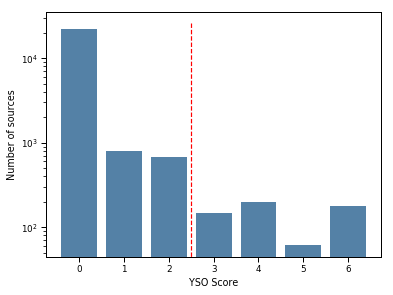

In [160]:
# Score histograms

fig = plt.figure(figsize=(6,4.5))
ax = sns.countplot(reliable_cat['YSO Score'], color='steelblue')
ax.set_yscale('log')
ax.set_ylabel('Number of sources')
#ax.set_ylim(0,100)

x,y=[2.5,2.5],[26000,0]
plt.plot(x,y,'--',color='red')

plt.savefig("hist_score.pdf", bbox_inches='tight')

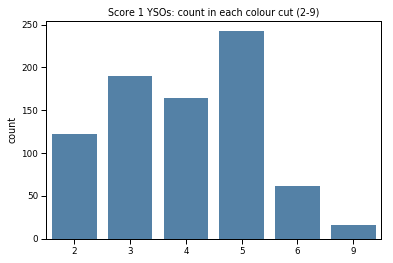

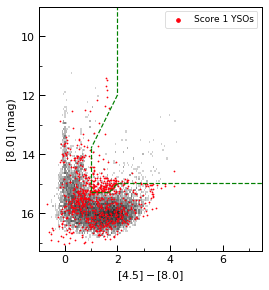

In [161]:
score_1_cat=reliable_cat[idx_YSO_score_1]
c2_met=len(np.where(score_1_cat['c2 met?'])[0])
c2_array=np.full((1, c2_met), 2, dtype=np.int)
c3_met=len(np.where(score_1_cat['c3 met?'])[0])
c3_array=np.full((1, c3_met), 3, dtype=np.int)
c4_met=len(np.where(score_1_cat['c4 met?'])[0])
c4_array=np.full((1, c4_met), 4, dtype=np.int)
c5_met=len(np.where(score_1_cat['c5 met?'])[0])
c5_array=np.full((1, c5_met), 5, dtype=np.int)
c6_met=len(np.where(score_1_cat['c6 met?'])[0])
c6_array=np.full((1, c6_met), 6, dtype=np.int)
c9_met=len(np.where(score_1_cat['c9 met?'])[0])
c9_array=np.full((1, c9_met), 9, dtype=np.int)
full_array=np.append(c2_array,c3_array)
full_array=np.append(full_array,c4_array)
full_array=np.append(full_array,c5_array)
full_array=np.append(full_array,c6_array)
full_array=np.append(full_array,c9_array)
ax = sns.countplot(full_array, color='steelblue')
ax.set_title('Score 1 YSOs: count in each colour cut (2-9)')
#score_1_cat.show_in_browser(jsviewer=True)

#4580 Spitzer
#Defining the magnitude and color
color = data['k45mag'][idx_4580]-data['k80mag'][idx_4580] 
mag2= data['k80mag'][idx_4580]

#Defining the edges of the 2D histogram for the Hess diagram  - makesure this matches your plot imits or is just smaller than
coledges = np.linspace(-2.0, 8, 200) #(min, max, nbins)
magedges = np.linspace(4, 18, 200)
extent = [coledges[0], coledges[-1], magedges[-1], magedges[0]]

plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=11)
plt.rc("ytick", labelsize=11)
plt.rc("axes", labelsize=11)
plt.rc("legend", fontsize=11)
# plt.rcdefaults()                    # Resets the parameters to their default values

#2D histogram
numH = np.histogram2d(mag2,color,bins=(magedges, coledges))
numH[0][numH[0] == 0] = np.nan
numH=np.log10(numH[0])*0.9         #logging it to show features, but you can use any stretch you like.

#Setting up figure, 6"x5" in this case
fig = plt.figure(figsize=(4,4.5))

plt.clf()      #clears plot area
ax = plt.gca() #sets up active plot region

#Set up plot window: limits, titles, etc. Note the "ax" that was defined earlier.
plt.setp(ax,xlim=[-1,7.5],
         ylim=[17.3,9],
         xlabel='$[4.5] - [8.0]$',
         ylabel='[8.0] (mag)')

x_majors=[0,2,4,6,8,12]
y_majors=np.linspace(8, 18,6)
ax.xaxis.set_major_locator(matplotlib.ticker.FixedLocator(x_majors))
ax.yaxis.set_major_locator(matplotlib.ticker.FixedLocator(y_majors))
x_minors = np.linspace(-2, 8, 11)[1:-1]
ax.xaxis.set_minor_locator(matplotlib.ticker.FixedLocator(x_minors))
y_minors = np.linspace(8, 20, 13)[1:-1]
ax.yaxis.set_minor_locator(matplotlib.ticker.FixedLocator(y_minors))
plt.tick_params(which='minor',direction='in',length=3)
plt.tick_params(which='major',direction='in',length=6)

#Show the image (the 2D histogram)
im = ax.imshow(numH,extent=extent,interpolation='nearest',
            vmin=0,vmax=1000,aspect='auto')

im.set_clim(0,1.5)         #clipping values of the image to show.
im.set_cmap('gist_yarg')   #choosing a color map

#Plot all potential YSOs making the cut
#plt.scatter(data['k45mag'][c4_idx]-data['k80mag'][c4_idx], data['k80mag'][c4_idx], s=0.9,color=sns.xkcd_rgb['bright purple'], label="YSO candidates")
# Plot all reliable stars which satify the cut criteria
plt.scatter(reliable_cat['k45mag'][idx_YSO_score_1]-reliable_cat['k80mag'][idx_YSO_score_1], reliable_cat['k80mag'][idx_YSO_score_1], s=0.9,color=sns.xkcd_rgb['bright red'], label="Score 1 YSOs")

lines=([2,2],[6,7.7+mod],[2,1],[7.7+mod,9.5+mod],[1,1],[9.5+mod,11+mod],[1,1.7],[11+mod,11+mod],[1.7,2],[11+mod,10.7+mod],[2,8],[10.7+mod,10.7+mod])
lim=int(0.5*len(lines))
for i in range(lim):
    x,y=lines[2*i],lines[2*i+1]
    plt.plot(x,y,'--',color='green',linewidth=1.2)

# Add a legend and a title
plt.legend(loc="upper right",frameon=True, scatterpoints=1, numpoints=1, markerscale=4,fontsize=9)

Text(0.5,1,'Score 2 YSOs: count in each colour cut (2-9)')

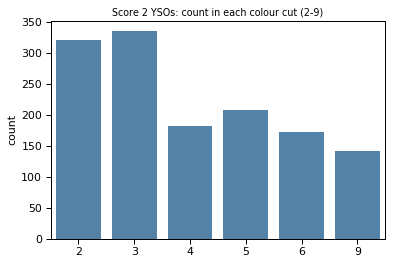

In [162]:
c2_met=len(np.where(score_2_cat['c2 met?'])[0])
c2_array=np.full((1, c2_met), 2, dtype=np.int)
c3_met=len(np.where(score_2_cat['c3 met?'])[0])
c3_array=np.full((1, c3_met), 3, dtype=np.int)
c4_met=len(np.where(score_2_cat['c4 met?'])[0])
c4_array=np.full((1, c4_met), 4, dtype=np.int)
c5_met=len(np.where(score_2_cat['c5 met?'])[0])
c5_array=np.full((1, c5_met), 5, dtype=np.int)
c6_met=len(np.where(score_2_cat['c6 met?'])[0])
c6_array=np.full((1, c6_met), 6, dtype=np.int)
c9_met=len(np.where(score_2_cat['c9 met?'])[0])
c9_array=np.full((1, c9_met), 9, dtype=np.int)
full_array=np.append(c2_array,c3_array)
full_array=np.append(full_array,c4_array)
full_array=np.append(full_array,c5_array)
full_array=np.append(full_array,c6_array)
full_array=np.append(full_array,c9_array)
ax = sns.countplot(full_array, color='steelblue')
ax.set_title('Score 2 YSOs: count in each colour cut (2-9)')

# Location plots and contamination

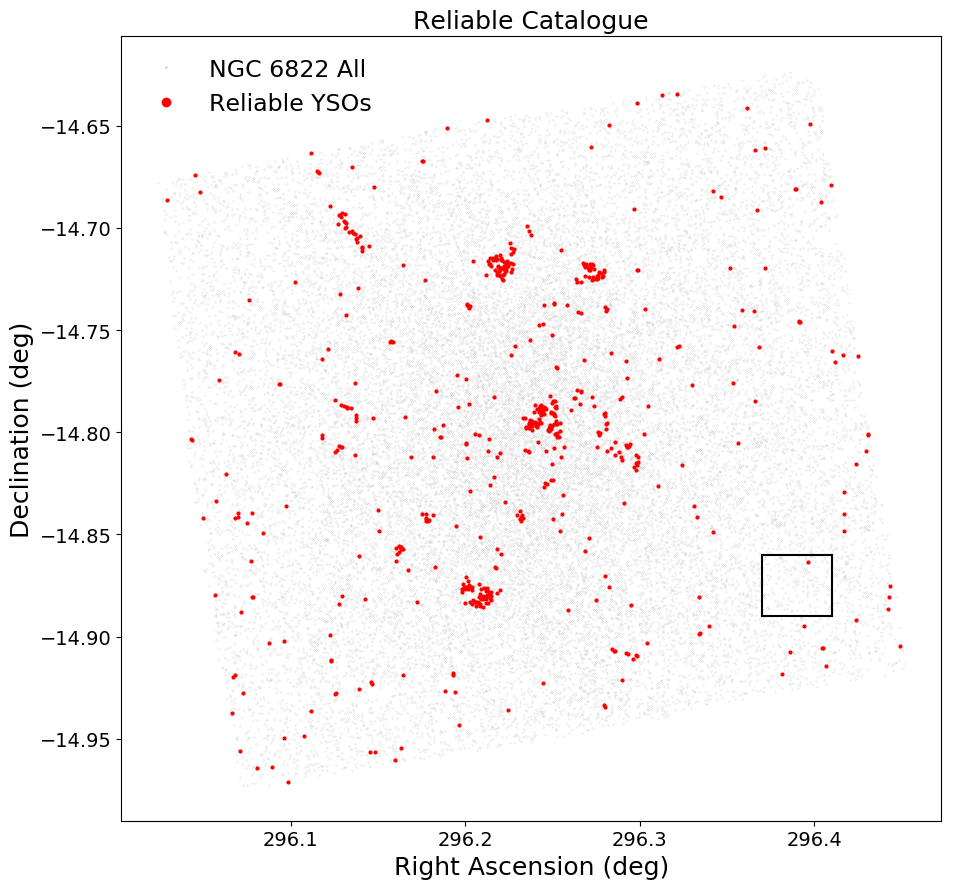

In [143]:
minRA=296.37*u.degree
maxRA=296.41*u.degree
minDec=-14.89*u.degree
maxDec=-14.86*u.degree


#Location plot for good score sources
def location_plot(sp_idx,num):
    # Plot the cataloge data on the sky
    # Setting up plotting sizes
    # plt.rc("text",  usetex=True)         # Allows latex commands
    plt.rcParams.update(plt.rcParamsDefault)       #Keeps the background white
    plt.rc('font', family='sans-serif')
    plt.rc("xtick", labelsize=14)
    plt.rc("ytick", labelsize=14)
    plt.rc("axes", labelsize=14)
    plt.rc("legend", fontsize=17)
    # plt.rcdefaults()                    # Resets the parameters to their default values
    
    
    # Setting up figure
    plt.figure(figsize=(18,9))
    ax = plt.gca()                        # Sets up active plot region
    
    #Make 1st diagram for 1st reliable catalogue
    plt.subplot(1,2,1)
    # Make the actual plot
    plt.plot(reliable_cat['RA'], reliable_cat['Dec'], '.', color='grey', ms=0.2, label="NGC 6822 All")
    
    #Over plot sensible sources which make the colour cut criteria
    #plt.plot(data['RA'][all_idx], data['Dec'][all_idx], '.', color='darkviolet', ms=4, label="YSO candidates")
    
    #overplot all reliable sources that meet the cut
    plt.plot(reliable_cat['RA'][sp_idx], reliable_cat['Dec'][sp_idx], '.', color='red', ms=4, label="Reliable YSOs")
    
    plt.xlabel('Right Ascension (deg)', size=18)
    plt.ylabel('Declination (deg)', size=18)
    
    # Add a legend and a title
    plt.legend(loc="upper left",frameon=False, scatterpoints=1, numpoints=1, markerscale=3.)
    plt.title(num,fontsize=18)
    
    x1,y1=[maxRA.value,minRA.value],[minDec.value,minDec.value]
    x2,y2=[minRA.value,minRA.value],[minDec.value,maxDec.value]
    x3,y3=[minRA.value,maxRA.value],[maxDec.value,maxDec.value]
    x4,y4=[maxRA.value,maxRA.value],[maxDec.value,minDec.value]
    plt.plot(x1,y1,x2,y2,x3,y3,x4,y4,color='black')
    
    #Make 2nd diagram for 2nd reliable catalogue
    #plt.subplot(1,2,2)
    # Make the actual plot
    #plt.plot(reliable_cat['RA'], reliable_cat['Dec'], '.', color='grey', ms=0.2, label="NGC 6822 All")
    
    #Over plot sensible sources which make the colour cut criteria
    #plt.plot(data['RA'][all_idx], data['Dec'][all_idx], '.', color='darkviolet', ms=4, label="YSO candidates")
    
    #plt.plot(data['RA'][HJK_idx], data['Dec'][HJK_idx], '.', color='lightblue', ms=4, label="Reliable YSOs (JHK)")
    
    #plt.xlabel('Right Ascension (deg)', size=18)
    #plt.ylabel('Declination (deg)', size=18)
    
    # Add a legend and a title
    #plt.legend(loc="upper left",frameon=False, scatterpoints=1, numpoints=1, markerscale=3.)
    #plt.title('Cut '+num+': 2nd catalogue (JHK)',fontsize=18)
    
    #x1,y1=[maxRA.value,minRA.value],[minDec.value,minDec.value]
    #x2,y2=[minRA.value,minRA.value],[minDec.value,maxDec.value]
    #x3,y3=[minRA.value,maxRA.value],[maxDec.value,maxDec.value]
    #x4,y4=[maxRA.value,maxRA.value],[maxDec.value,minDec.value]
    #plt.plot(x1,y1,x2,y2,x3,y3,x4,y4,marker='o')
    
    #plt.savefig("bla.pdf", bbox_inches='tight')    # Saves the figure is uncommented
    plt.tight_layout()
    plt.show()
    plt.close()

location_plot(idx_rel_score,'Reliable Catalogue')

In [144]:
# create an index for reliably-scored sources which are positioned within the above box

idx_total_sources_box=np.where((reliable_cat['RA']<(maxRA.to(u.deg)).value)&(reliable_cat['RA']>(minRA.to(u.deg)).value)&(reliable_cat['Dec']<(maxDec.to(u.deg)).value)&(reliable_cat['Dec']>(minDec.to(u.deg)).value))
num_total_sources_box=len(idx_total_sources_box[0])
print('The total number of sources in the box is',num_total_sources_box)
print('')

minRA=minRA.to(u.arcmin)
maxRA=maxRA.to(u.arcmin)
minDec=minDec.to(u.arcmin)
maxDec=maxDec.to(u.arcmin)
box_width=(maxRA-minRA)
print('Box width is',round(box_width.value,2),box_width.unit)
box_height=maxDec-minDec
print('Box height is',round(box_height.value,2),box_height.unit)
box_area=box_width*box_height
print('Box area is',round(box_area.value,2),box_area.unit)
print('')


#ignore some of these
box_idx=np.where((reliable_cat['RA']<(maxRA.to(u.deg)).value)&(reliable_cat['RA']>(minRA.to(u.deg)).value)&(reliable_cat['Dec']<(maxDec.to(u.deg)).value)&(reliable_cat['Dec']>(minDec.to(u.deg)).value)&(reliable_cat['YSO Score']>=3))
num_contam=len(box_idx[0])
print('The number of reliably-scored sources in the box is',num_contam)
print('There are',round((num_contam/(box_area.value)),2),'sources of contamination per square arcmin (2d.p.)')

print('The number of sources per arcmin^2 in the box is',round(num_total_sources_box/(box_height.value*box_width.value),2))
print('The number of YSOs per arcmin^2 in the box is',round(num_contam/(box_height.value*box_width.value),2))

The total number of sources in the box is 160

Box width is 2.4 arcmin
Box height is 1.8 arcmin
Box area is 4.32 arcmin2

The number of reliably-scored sources in the box is 1
There are 0.23 sources of contamination per square arcmin (2d.p.)
The number of sources per arcmin^2 in the box is 37.04
The number of YSOs per arcmin^2 in the box is 0.23


In [145]:
FOV_width=0.375*u.deg
FOV_width=FOV_width.to(u.arcmin)
FOV_length=0.31*u.deg
FOV_length=FOV_length.to(u.arcmin)
FOV_area=FOV_width*FOV_length

print("Total FOV area is",round(FOV_area.value,2),FOV_area.unit)

ratio_area=FOV_area/box_area
print("The ratio of the total FOV to the box is ",round(ratio_area.value,2))
print('')

scaled_contam_num=ratio_area*num_contam
print("The average number of contaminants in the entire FOV is ",round(scaled_contam_num.value,2))

print("The number of YSOs in the total FOV is "+str(YSO_num))
print("Therfore the contamination percentage is ",round((100*scaled_contam_num.value/YSO_num),2),"%")
#print(FOV_length.to(u.deg)*FOV_width.to(u.deg))


Total FOV area is 418.5 arcmin2
The ratio of the total FOV to the box is  96.87

The average number of contaminants in the entire FOV is  96.87
The number of YSOs in the total FOV is 584
Therfore the contamination percentage is  16.59 %
0.11624999999999999 deg2


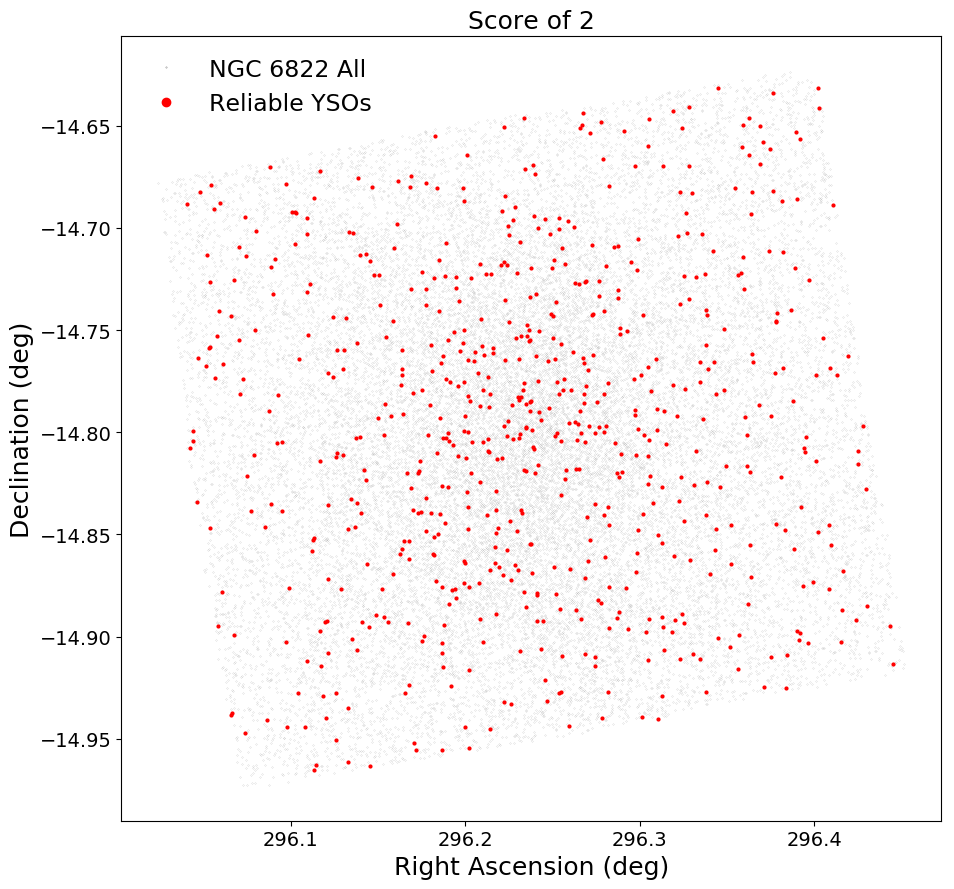

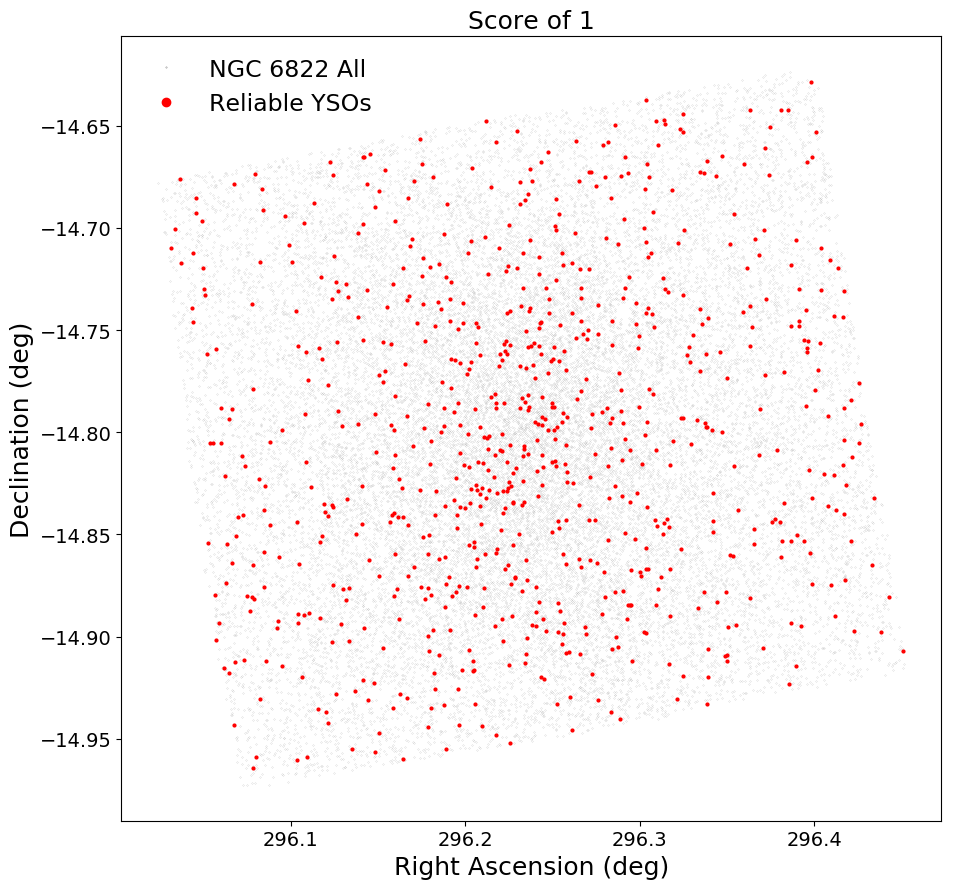

In [146]:
#Location plots
def location_plot(sp_idx,num):
    # Plot the cataloge data on the sky
    # Setting up plotting sizes
    # plt.rc("text",  usetex=True)         # Allows latex commands
    plt.rcParams.update(plt.rcParamsDefault)       #Keeps the background white
    plt.rc('font', family='sans-serif')
    plt.rc("xtick", labelsize=14)
    plt.rc("ytick", labelsize=14)
    plt.rc("axes", labelsize=14)
    plt.rc("legend", fontsize=17)
    # plt.rcdefaults()                    # Resets the parameters to their default values
    
    
    # Setting up figure
    plt.figure(figsize=(18,9))
    ax = plt.gca()                        # Sets up active plot region
    
    #Make 1st diagram for 1st reliable catalogue
    plt.subplot(1,2,1)
    # Make the actual plot
    plt.plot(reliable_cat['RA'], reliable_cat['Dec'], '.', color='grey', ms=0.2, label="NGC 6822 All")
    
    #Over plot sensible sources which make the colour cut criteria
    #plt.plot(data['RA'][all_idx], data['Dec'][all_idx], '.', color='darkviolet', ms=4, label="YSO candidates")
    
    #overplot all reliable sources that meet the cut
    plt.plot(data['RA'][sp_idx], data['Dec'][sp_idx], '.', color='red', ms=4, label="Reliable YSOs")
    
    plt.xlabel('Right Ascension (deg)', size=18)
    plt.ylabel('Declination (deg)', size=18)
    
    # Add a legend and a title
    plt.legend(loc="upper left",frameon=False, scatterpoints=1, numpoints=1, markerscale=3.)
    plt.title(num,fontsize=18)
    
    #plt.savefig("bla.pdf", bbox_inches='tight')    # Saves the figure is uncommented
    plt.tight_layout()
    plt.show()
    plt.close()
    
    '''
    #Make 2nd diagram for 2nd reliable catalogue
    plt.subplot(1,2,2)
    # Make the actual plot
    plt.plot(reliable_cat['RA'], reliable_cat['Dec'], '.', color='grey', ms=0.2, label="NGC 6822 All")
    
    #Over plot sensible sources which make the colour cut criteria
    #plt.plot(data['RA'][all_idx], data['Dec'][all_idx], '.', color='darkviolet', ms=4, label="YSO candidates")
    
    plt.plot(data['RA'][HJK_idx], data['Dec'][HJK_idx], '.', color='lightblue', ms=4, label="Reliable YSOs (JHK)")
    
    plt.xlabel('Right Ascension (deg)', size=18)
    plt.ylabel('Declination (deg)', size=18)
    
    # Add a legend and a title
    plt.legend(loc="upper left",frameon=False, scatterpoints=1, numpoints=1, markerscale=3.)
    plt.title('Cut '+num+': 2nd catalogue (JHK)',fontsize=18)
    '''
    
location_plot(idx_YSO_score_2,'Score of 2')
location_plot(idx_YSO_score_1,'Score of 1')

# CMDs

In [10]:
#Create indices to be used for CMDs and CCDs. These will contain sources which are not
#upper limits in any of the relevant filters in the entire <data> catalogue


rel_CMD3658_idx = ((reliable_score_cat['k36mag'] > 0.0) & (reliable_score_cat['e36mag'] < err) & (reliable_score_cat['e36mag'] > 0.0)&(reliable_score_cat['k58mag'] > 0.0) & (reliable_score_cat['e58mag'] < err) & (reliable_score_cat['e58mag'] > 0.0)) 
rel_CMD3658_cat = reliable_score_cat[rel_CMD3658_idx]
rel_idx_3658=np.where(rel_CMD3658_idx)
print("Number of stars with good 36/58 data: {}".format(len(rel_idx_3658[0])))

rel_CMD4558_idx = ((reliable_score_cat['k45mag'] > 0.0) & (reliable_score_cat['e45mag'] < err) & (reliable_score_cat['e45mag'] > 0.0)&(reliable_score_cat['k58mag'] > 0.0) & (reliable_score_cat['e58mag'] < err) & (reliable_score_cat['e58mag'] > 0.0)) 
rel_CMD4558_cat = reliable_score_cat[rel_CMD4558_idx]
rel_idx_4558=np.where(rel_CMD4558_idx)
print("Number of stars with good 45/58 data: {}".format(len(rel_idx_4558[0])))

rel_CMD4580_idx = ((reliable_score_cat['k45mag'] > 0.0) & (reliable_score_cat['e45mag'] < err) & (reliable_score_cat['e45mag'] > 0.0)&(reliable_score_cat['k80mag'] > 0.0) & (reliable_score_cat['e80mag'] < err) & (reliable_score_cat['e80mag'] > 0.0)) 
rel_CMD4580_cat = reliable_score_cat[rel_CMD4580_idx]
rel_idx_4580=np.where(rel_CMD4580_idx)
print("Number of stars with good 45/80 data: {}".format(len(rel_idx_4580[0])))

rel_CMD4524_idx = ((reliable_score_cat['k45mag'] > 0.0) & (reliable_score_cat['e45mag'] < err) & (reliable_score_cat['e45mag'] > 0.0)&(reliable_score_cat['k24mag'] > 0.0) & (reliable_score_cat['e24mag'] < err) & (reliable_score_cat['e24mag'] > 0.0)) 
rel_CMD4524_cat = reliable_score_cat[rel_CMD4524_idx]
rel_idx_4524=np.where(rel_CMD4524_idx)
print("Number of stars with good 45/24 data: {}".format(len(rel_idx_4524[0])))

rel_CMD8024_idx = ((reliable_score_cat['k80mag'] > 0.0) & (reliable_score_cat['e80mag'] < err) & (reliable_score_cat['e80mag'] > 0.0)&(reliable_score_cat['k24mag'] > 0.0) & (reliable_score_cat['e24mag'] < err) & (reliable_score_cat['e24mag'] > 0.0)) 
rel_CMD8024_cat = reliable_score_cat[rel_CMD8024_idx]
rel_idx_8024=np.where(rel_CMD8024_idx)
print("Number of stars with good 80/24 data: {}".format(len(rel_idx_8024[0])))

rel_CMD3645_idx = ((reliable_score_cat['k36mag'] > 0.0) & (reliable_score_cat['e36mag'] < err) & (reliable_score_cat['e36mag'] > 0.0)&(reliable_score_cat['k45mag'] > 0.0) & (reliable_score_cat['e45mag'] < err) & (reliable_score_cat['e45mag'] > 0.0)) 
rel_CMD3645_cat = reliable_score_cat[rel_CMD3645_idx]
rel_idx_3645=np.where(rel_CMD3645_idx)
print("Number of stars with good 36/45 data: {}".format(len(rel_idx_3645[0])))

rel_CMD3680_idx = ((reliable_score_cat['k36mag'] > 0.0) & (reliable_score_cat['e36mag'] < err) & (reliable_score_cat['e36mag'] > 0.0)&(reliable_score_cat['k80mag'] > 0.0) & (reliable_score_cat['e80mag'] < err) & (reliable_score_cat['e80mag'] > 0.0)) 
rel_CMD3680_cat = reliable_score_cat[rel_CMD3680_idx]
rel_idx_3680=np.where(rel_CMD3680_idx)
print("Number of stars with good 36/80 data: {}".format(len(rel_idx_3680[0])))

rel_CCDHKK45_idx = ((reliable_score_cat['Hmag'] > 0.0) & (reliable_score_cat['eHmag'] < err) & (reliable_score_cat['eHmag'] > 0.0)&(reliable_score_cat['Kmag'] > 0.0) & (reliable_score_cat['eKmag'] < err) & (reliable_score_cat['eKmag'] > 0.0)&(reliable_score_cat['k45mag'] > 0.0) & (reliable_score_cat['e45mag'] < err) & (reliable_score_cat['e45mag'] > 0.0)) 
rel_CCDHKK45_cat = reliable_score_cat[rel_CCDHKK45_idx]
rel_idx_HKK45=np.where(rel_CCDHKK45_idx)
print("Number of stars with good H/K/45 data: {}".format(len(rel_idx_HKK45[0])))

rel_CCDJKJ45_idx = ((reliable_score_cat['Jmag'] > 0.0) & (reliable_score_cat['eJmag'] < err) & (reliable_score_cat['eJmag'] > 0.0)&(reliable_score_cat['Kmag'] > 0.0) & (reliable_score_cat['eKmag'] < err) & (reliable_score_cat['eKmag'] > 0.0)&(reliable_score_cat['k45mag'] > 0.0) & (reliable_score_cat['e45mag'] < err) & (reliable_score_cat['e45mag'] > 0.0)) 
rel_CCDJKJ45_cat = reliable_score_cat[rel_CCDJKJ45_idx]
rel_idx_JKJ45=np.where(rel_CCDJKJ45_idx)
print("Number of stars with good J/K/45 data: {}".format(len(rel_idx_JKJ45[0])))

rel_CCDJHH45_idx = ((reliable_score_cat['Jmag'] > 0.0) & (reliable_score_cat['eJmag'] < err) & (reliable_score_cat['eJmag'] > 0.0)&(reliable_score_cat['Hmag'] > 0.0) & (reliable_score_cat['eHmag'] < err) & (reliable_score_cat['eHmag'] > 0.0)&(reliable_score_cat['k45mag'] > 0.0) & (reliable_score_cat['e45mag'] < err) & (reliable_score_cat['e45mag'] > 0.0)) 
rel_CCDJHH45_cat = reliable_score_cat[rel_CCDJHH45_idx]
rel_idx_JHH45=np.where(rel_CCDJHH45_idx)
print("Number of stars with good J/H/45 data: {}".format(len(rel_idx_JHH45[0])))

rel_CCDK363645_idx = ((reliable_score_cat['Kmag'] > 0.0) & (reliable_score_cat['eKmag'] < err) & (reliable_score_cat['eKmag'] > 0.0)&(reliable_score_cat['k36mag'] > 0.0) & (reliable_score_cat['e36mag'] < err) & (reliable_score_cat['e36mag'] > 0.0)&(reliable_score_cat['k45mag'] > 0.0) & (reliable_score_cat['e45mag'] < err) & (reliable_score_cat['e45mag'] > 0.0)) 
rel_CCDK363645_cat = reliable_score_cat[rel_CCDK363645_idx]
rel_idx_K363645=np.where(rel_CCDK363645_idx)
print("Number of stars with good K/36/45 data: {}".format(len(rel_idx_K363645[0])))

rel_CCD36454558_idx = ((reliable_score_cat['k36mag'] > 0.0) & (reliable_score_cat['e36mag'] < err) & (reliable_score_cat['e36mag'] > 0.0)&(reliable_score_cat['k58mag'] > 0.0) & (reliable_score_cat['e58mag'] < err) & (reliable_score_cat['e58mag'] > 0.0)&(reliable_score_cat['k45mag'] > 0.0) & (reliable_score_cat['e45mag'] < err) & (reliable_score_cat['e45mag'] > 0.0)) 
rel_CCD36454558_cat = reliable_score_cat[rel_CCD36454558_idx]
rel_idx_36454558=np.where(rel_CCD36454558_idx)
print("Number of stars with good 36/45/58 data: {}".format(len(rel_idx_36454558[0])))

rel_CCDHK3645_idx = ((reliable_score_cat['k36mag'] > 0.0) & (reliable_score_cat['e36mag'] < err) & (reliable_score_cat['e36mag'] > 0.0)&(reliable_score_cat['k45mag'] > 0.0) & (reliable_score_cat['e45mag'] < err) & (reliable_score_cat['e45mag'] > 0.0)&(reliable_score_cat['Hmag'] > 0.0) & (reliable_score_cat['eHmag'] < err) & (reliable_score_cat['eHmag'] > 0.0)&(reliable_score_cat['Kmag'] > 0.0) & (reliable_score_cat['eKmag'] < err) & (reliable_score_cat['eKmag'] > 0.0)) 
rel_CCDHK3645_cat = reliable_score_cat[rel_CCDHK3645_idx]
rel_idx_HK3645=np.where(rel_CCDHK3645_idx)
print("Number of stars with good H/K/36/45 data: {}".format(len(rel_idx_HK3645[0])))

Number of stars with good 36/58 data: 562
Number of stars with good 45/58 data: 560
Number of stars with good 45/80 data: 574
Number of stars with good 45/24 data: 529
Number of stars with good 80/24 data: 527
Number of stars with good 36/45 data: 578
Number of stars with good 36/80 data: 576
Number of stars with good H/K/45 data: 135
Number of stars with good J/K/45 data: 122
Number of stars with good J/H/45 data: 125
Number of stars with good K/36/45 data: 135
Number of stars with good 36/45/58 data: 558
Number of stars with good H/K/36/45 data: 135


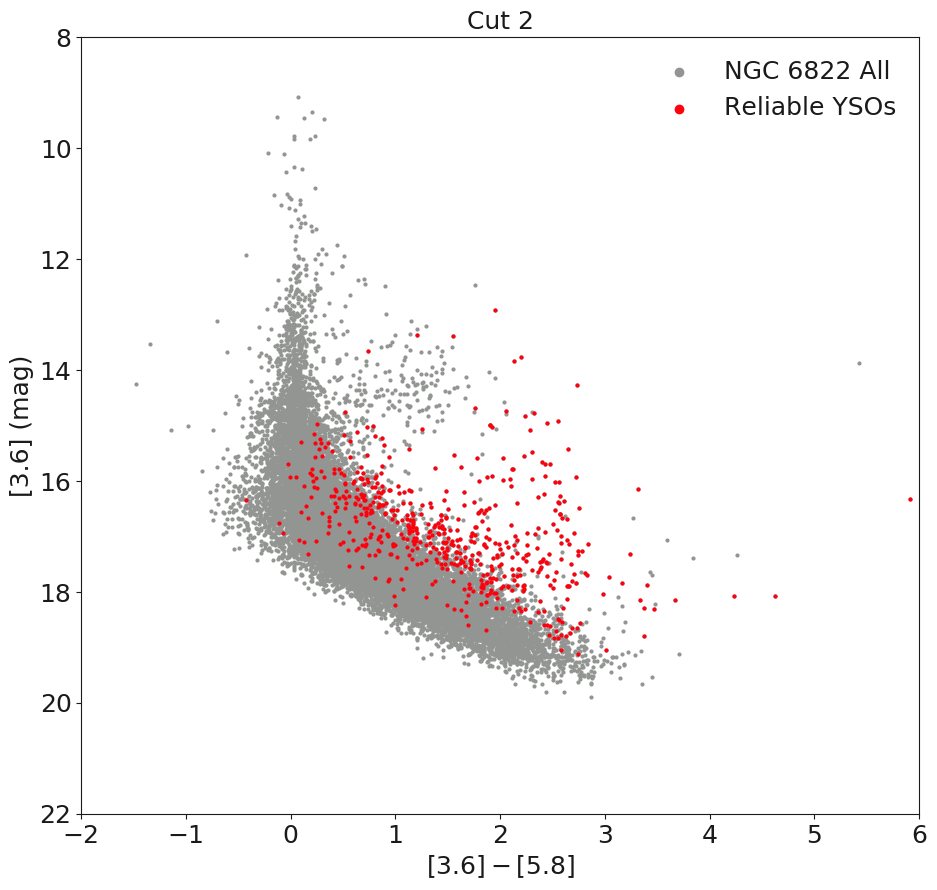

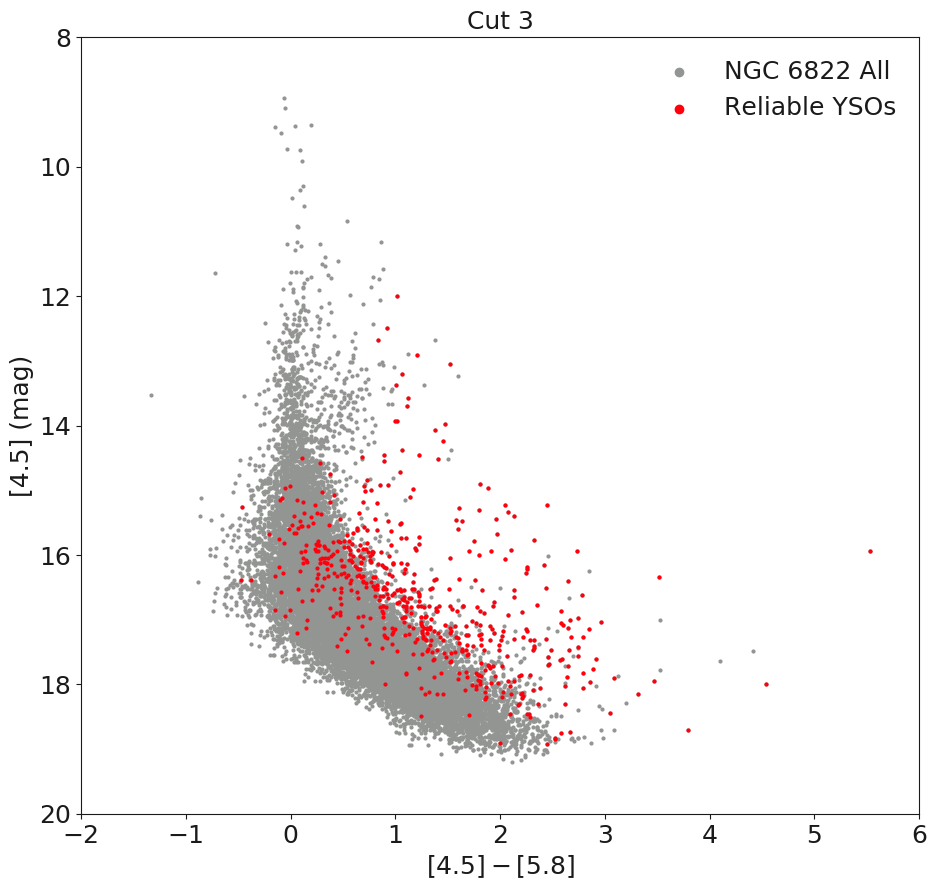

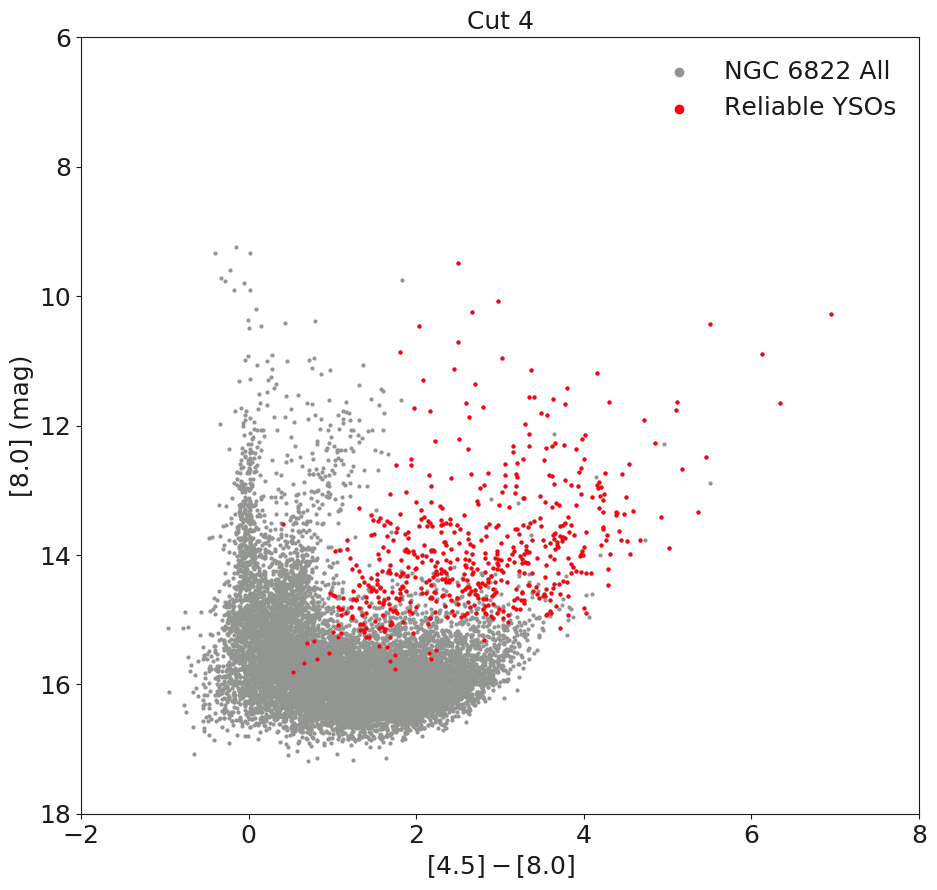

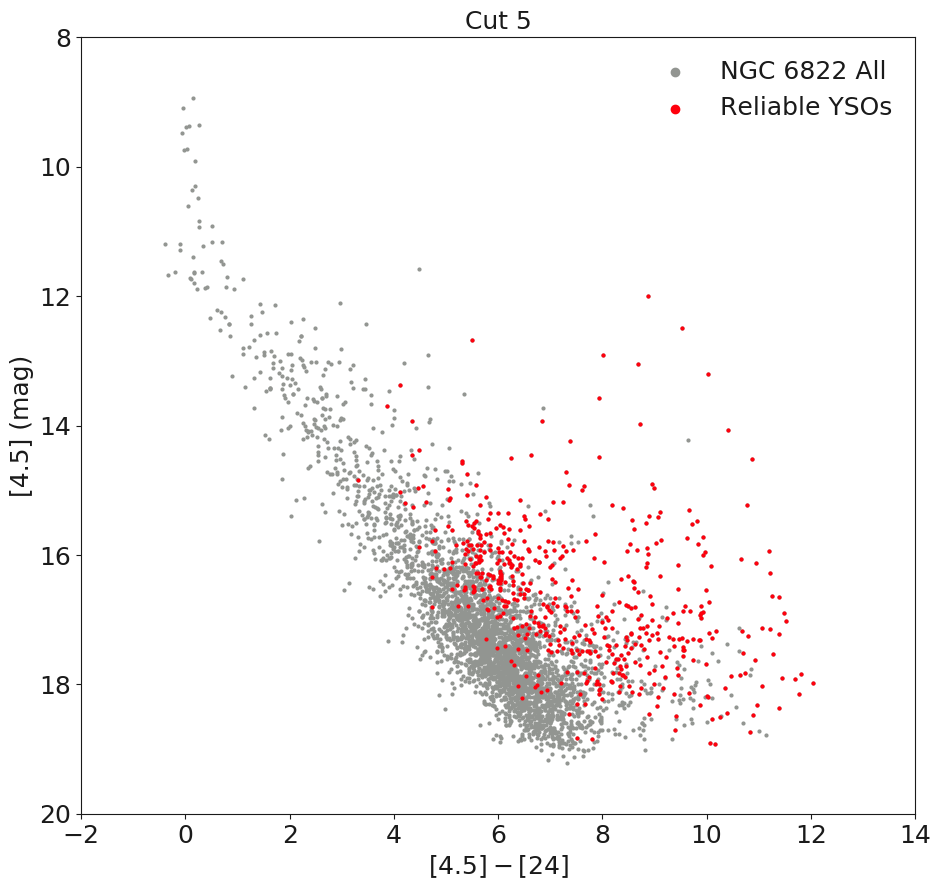

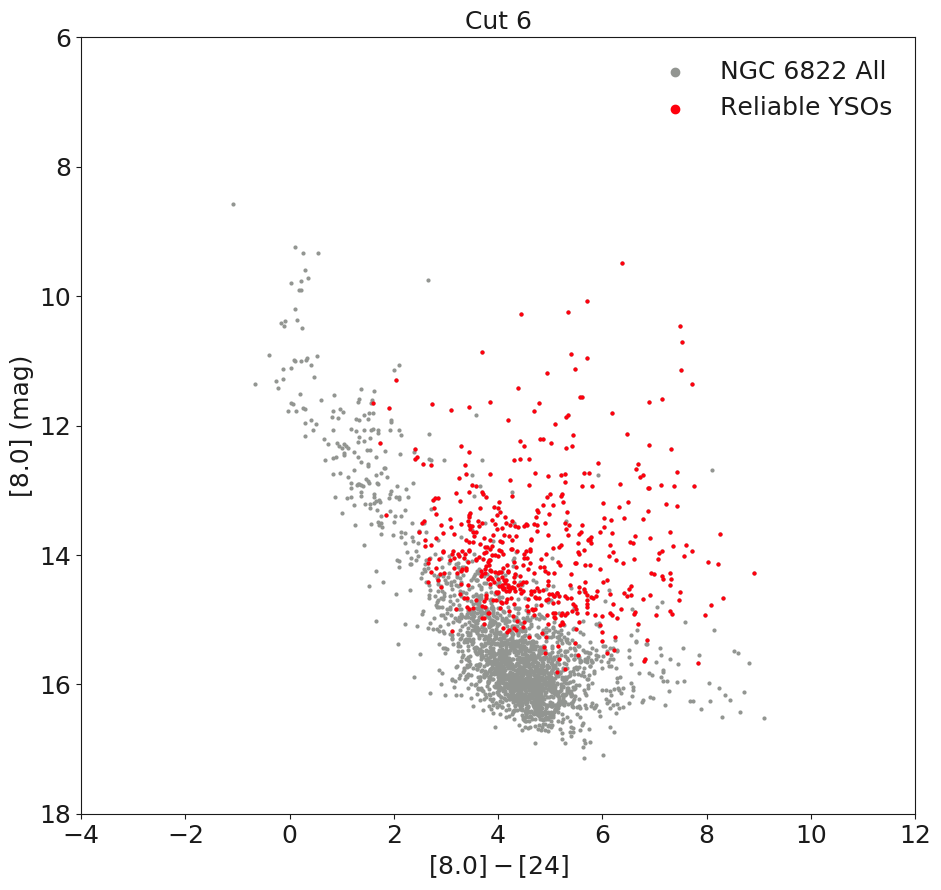

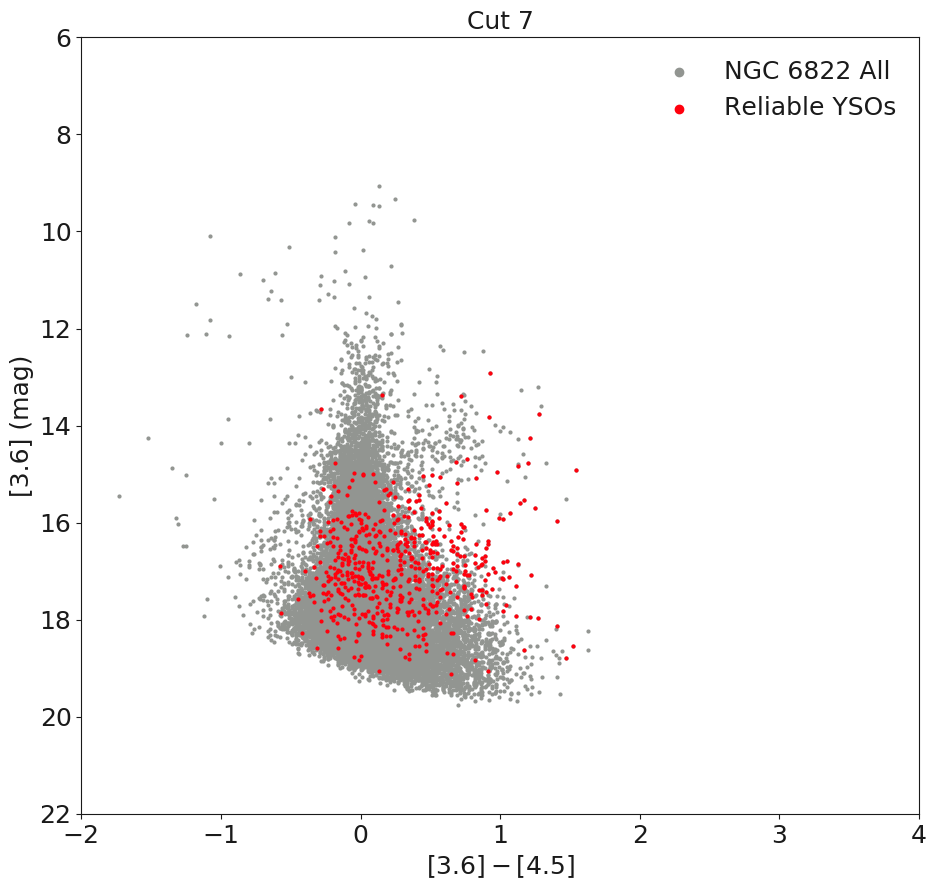

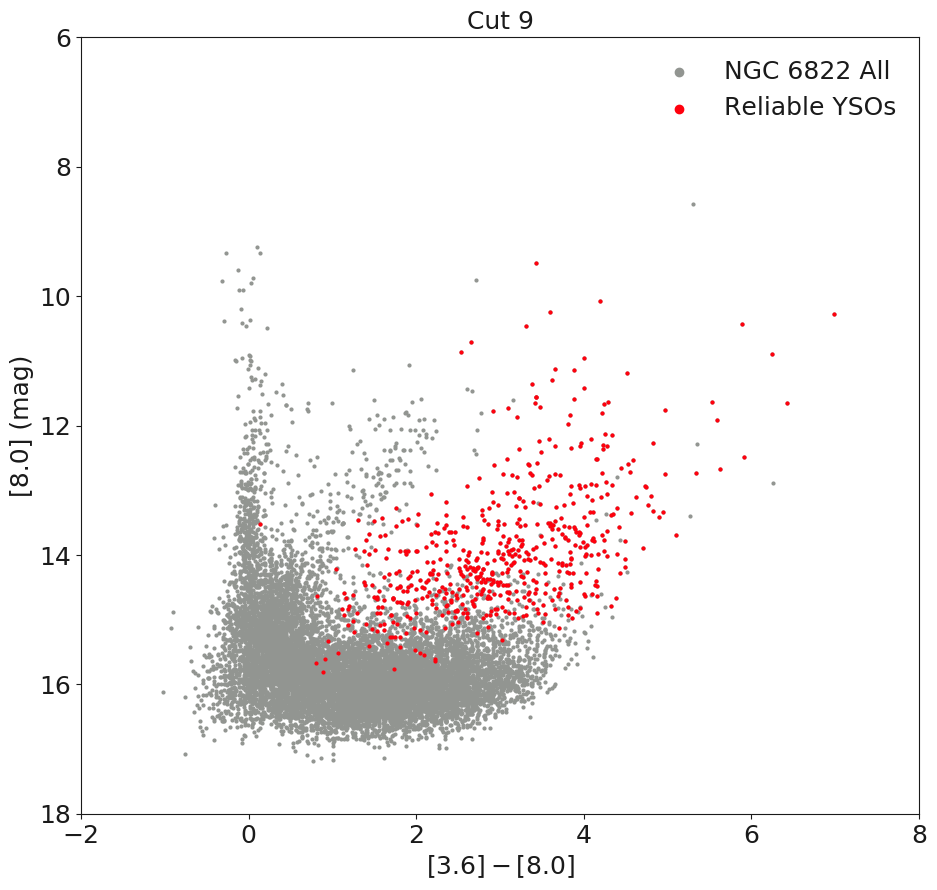

In [401]:
def CMD(A,B,C,bgd_idx,cut_idx,num,xlabel,ylabel,xlim,ylim):
    # Setting up plotting sizes
    # plt.rc("text",  usetex=True)         # Allows latex commands
    plt.rcParams.update(plt.rcParamsDefault)       #Keeps the background white
    plt.rc('font', family='sans-serif')
    plt.rc("xtick", labelsize=18)
    plt.rc("ytick", labelsize=18)
    plt.rc("axes", labelsize=18)
    plt.rc("legend", fontsize=18)
    # plt.rcdefaults()                    # Resets the parameters to their default values
    
    # Setting up figure
    plt.figure(figsize=(18,9))
    ax = plt.gca()                        # Sets up active plot region
    
    #Make 1st diagram for 1st reliable catalogue
    plt.subplot(1,2,1)
    # Make the actual plot
    plt.scatter(data[B][bgd_idx]-data[C][bgd_idx], data[A][bgd_idx], s=4,color=sns.xkcd_rgb['grey'], label="NGC 6822 All")
    
    # Plot all sensible stars which satify the cut criteria
    #plt.scatter(data[B][all_idx]-data[C][all_idx], data[A][all_idx], s=3.9,color=sns.xkcd_rgb['bright purple'], label="YSO candidates")
    # Plot all reliable stars which satify the cut criteria
    plt.scatter(reliable_score_cat[B][cut_idx]-reliable_score_cat[C][cut_idx], reliable_score_cat[A][cut_idx], s=4,color=sns.xkcd_rgb['bright red'], label="Reliable YSOs")
    # Plot all probable stars which satify the cut criteria
    
    
    #plt.scatter(score_2_cat[B]-score_2_cat[C], score_2_cat[A], s=3.9,color=sns.xkcd_rgb['light yellow'], label="Probable YSOs")

    
    # Set the axis lables
    plt.xlabel(xlabel, fontsize=18)
    plt.ylabel(ylabel, fontsize=18)
    
    # Set limits if automatic values dont work well
    plt.xlim(xlim)      # Set the x-axis limits
    plt.ylim(ylim)           # Set the y-axis limits NB Smaller numbers are bighter in magnitudes so flip max/min values

    
    # Add a legend and a title
    plt.legend(loc="upper right",frameon=False, scatterpoints=1, numpoints=1, markerscale=3.)
    plt.title('Cut '+num, fontsize=18)
    
    #plt.savefig("bla.pdf", bbox_inches='tight')    # Saves the figure is uncommented
    plt.tight_layout()
    plt.show()
    plt.close()
    
    
CMD('k36mag','k36mag','k58mag',idx_3658,rel_idx_3658,'2','$[3.6] -[5.8]$','[3.6] (mag)',(-2,6),(22,8))
CMD('k45mag','k45mag','k58mag',idx_4558,rel_idx_4558,'3','$[4.5] -[5.8]$','[4.5] (mag)',(-2,6),(20,8))
CMD('k80mag','k45mag','k80mag',idx_4580,rel_idx_4580,'4','$[4.5] -[8.0]$','[8.0] (mag)',(-2,8),(18,6))
CMD('k45mag','k45mag','k24mag',idx_4524,rel_idx_4524,'5','$[4.5] -[24]$','[4.5] (mag)',(-2,14),(20,8))
CMD('k80mag','k80mag','k24mag',idx_8024,rel_idx_8024,'6','$[8.0] -[24]$','[8.0] (mag)',(-4,12),(18,6))
CMD('k36mag','k36mag','k45mag',idx_3645,rel_idx_3645,'7','$[3.6] -[4.5]$','[3.6] (mag)',(-2,4),(22,6))
CMD('k80mag','k36mag','k80mag',idx_3680,rel_idx_3680,'9','$[3.6] -[8.0]$','[8.0] (mag)',(-2,8),(18,6))


In [107]:
#ascii.write(data, 'NGC6822_Full_Statistics_YSO_Score.csv', format='csv', fast_writer=False)

# Hess CMDs

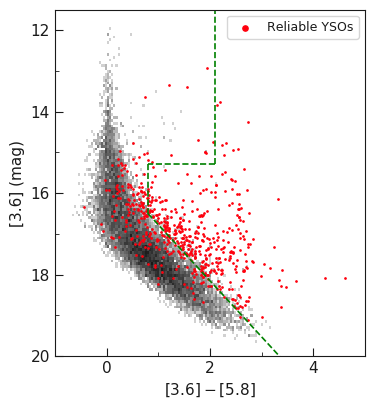

In [402]:
#3658 Spitzer
#Defining the magnitude and color
color = data['k36mag'][idx_3658]-data['k58mag'][idx_3658] 
mag2= data['k36mag'][idx_3658]

#Defining the edges of the 2D histogram for the Hess diagram  - makesure this matches your plot imits or is just smaller than
coledges = np.linspace(-2.0, 6, 200) #(min, max, nbins)
magedges = np.linspace(8, 22, 200)
extent = [coledges[0], coledges[-1], magedges[-1], magedges[0]]

plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=11)
plt.rc("ytick", labelsize=11)
plt.rc("axes", labelsize=11)
plt.rc("legend", fontsize=11)
# plt.rcdefaults()                    # Resets the parameters to their default values

#2D histogram
numH = np.histogram2d(mag2,color,bins=(magedges, coledges))
numH[0][numH[0] == 0] = np.nan
numH=np.log10(numH[0])*0.9         #logging it to show features, but you can use any stretch you like.

#Setting up figure, 6"x5" in this case
fig = plt.figure(figsize=(4,4.5))

plt.clf()      #clears plot area
ax = plt.gca() #sets up active plot region

#Set up plot window: limits, titles, etc. Note the "ax" that was defined earlier.
plt.setp(ax,xlim=[-1,5],
         ylim=[20,11.5],
         xlabel='$[3.6] - [5.8]$',
         ylabel='[3.6] (mag)')

x_majors=[0,2,4,6,8,12]
y_majors=np.linspace(8, 20,7)
ax.xaxis.set_major_locator(matplotlib.ticker.FixedLocator(x_majors))
ax.yaxis.set_major_locator(matplotlib.ticker.FixedLocator(y_majors))
x_minors = np.linspace(-2, 8, 11)[1:-1]
ax.xaxis.set_minor_locator(matplotlib.ticker.FixedLocator(x_minors))
y_minors = np.linspace(8, 20, 13)[1:-1]
ax.yaxis.set_minor_locator(matplotlib.ticker.FixedLocator(y_minors))
plt.tick_params(which='minor',direction='in',length=3)
plt.tick_params(which='major',direction='in',length=6)

#Show the image (the 2D histogram)
im = ax.imshow(numH,extent=extent,interpolation='nearest',
            vmin=0,vmax=1000,aspect='auto')

im.set_clim(0,1.5)         #clipping values of the image to show.
im.set_cmap('gist_yarg')   #choosing a color map

#Plot all potential YSOs making the cut
#plt.scatter(data['k36mag'][c2_idx]-data['k58mag'][c2_idx], data['k36mag'][c2_idx], s=0.9,color=sns.xkcd_rgb['bright purple'], label="YSO candidates")
# Plot all reliable stars which satify the cut criteria
plt.scatter(reliable_score_cat['k36mag'][rel_idx_3658]-reliable_score_cat['k58mag'][rel_idx_3658], reliable_score_cat['k36mag'][rel_idx_3658], s=0.9,color=sns.xkcd_rgb['bright red'], label="Reliable YSOs")

lines=([2.1,2.1],[8,11+mod],[2.1,0.8],[11+mod,11+mod],[0.8,0.8],[11+mod,16.5],[0.8,4.8],[16.5,22])
lim=int(0.5*len(lines))
for i in range(lim):
    x,y=lines[2*i],lines[2*i+1]
    plt.plot(x,y,'--',color='green',linewidth=1.2)

# Add a legend and a title
plt.legend(loc="upper right",frameon=True, scatterpoints=1, numpoints=1, markerscale=4,fontsize=9)
plt.savefig("36_58_Hess.pdf", bbox_inches='tight')

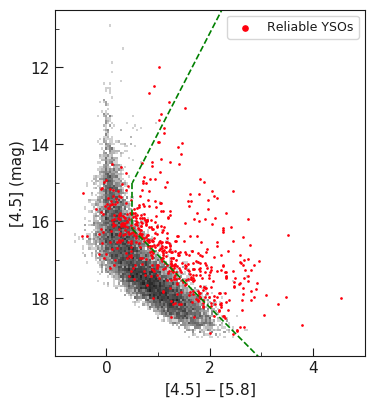

In [403]:
#4558 Spitzer
#Defining the magnitude and color
color = data['k45mag'][idx_4558]-data['k58mag'][idx_4558] 
mag2= data['k45mag'][idx_4558]

#Defining the edges of the 2D histogram for the Hess diagram  - makesure this matches your plot imits or is just smaller than
coledges = np.linspace(-2.0, 6, 200) #(min, max, nbins)
magedges = np.linspace(8, 20, 200)
extent = [coledges[0], coledges[-1], magedges[-1], magedges[0]]

plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=11)
plt.rc("ytick", labelsize=11)
plt.rc("axes", labelsize=11)
plt.rc("legend", fontsize=11)
# plt.rcdefaults()                    # Resets the parameters to their default values

#2D histogram
numH = np.histogram2d(mag2,color,bins=(magedges, coledges))
numH[0][numH[0] == 0] = np.nan
numH=np.log10(numH[0])*0.9         #logging it to show features, but you can use any stretch you like.

#Setting up figure, 6"x5" in this case
fig = plt.figure(figsize=(4,4.5))

plt.clf()      #clears plot area
ax = plt.gca() #sets up active plot region

#Set up plot window: limits, titles, etc. Note the "ax" that was defined earlier.
plt.setp(ax,xlim=[-1,5],
         ylim=[19.5,10.5],
         xlabel='$[4.5] - [5.8]$',
         ylabel='[4.5] (mag)')

x_majors=[0,2,4,6,8,12]
y_majors=np.linspace(8, 18,6)
ax.xaxis.set_major_locator(matplotlib.ticker.FixedLocator(x_majors))
ax.yaxis.set_major_locator(matplotlib.ticker.FixedLocator(y_majors))
x_minors = np.linspace(-2, 8, 11)[1:-1]
ax.xaxis.set_minor_locator(matplotlib.ticker.FixedLocator(x_minors))
y_minors = np.linspace(8, 20, 13)[1:-1]
ax.yaxis.set_minor_locator(matplotlib.ticker.FixedLocator(y_minors))
plt.tick_params(which='minor',direction='in',length=3)
plt.tick_params(which='major',direction='in',length=6)

#Show the image (the 2D histogram)
im = ax.imshow(numH,extent=extent,interpolation='nearest',
            vmin=0,vmax=1000,aspect='auto')

im.set_clim(0,1.5)         #clipping values of the image to show.
im.set_cmap('gist_yarg')   #choosing a color map

#Plot all potential YSOs making the cut
#plt.scatter(data['k45mag'][c3_idx]-data['k58mag'][c3_idx], data['k45mag'][c3_idx], s=0.9,color=sns.xkcd_rgb['bright purple'], label="YSO candidates")
# Plot all reliable stars which satify the cut criteria
plt.scatter(reliable_score_cat['k45mag'][rel_idx_4558]-reliable_score_cat['k58mag'][rel_idx_4558], reliable_score_cat['k45mag'][rel_idx_4558], s=0.9,color=sns.xkcd_rgb['bright red'], label="Reliable YSOs")

lines=([3.2,0.5],[8,15],[0.5,0.5],[15,16.2],[0.5,3.3],[16.2,20])
lim=int(0.5*len(lines))
for i in range(lim):
    x,y=lines[2*i],lines[2*i+1]
    plt.plot(x,y,'--',color='green',linewidth=1.2)

# Add a legend and a title
plt.legend(loc="upper right",frameon=True, scatterpoints=1, numpoints=1, markerscale=4,fontsize=9)
plt.savefig("45_58_Hess.pdf", bbox_inches='tight')

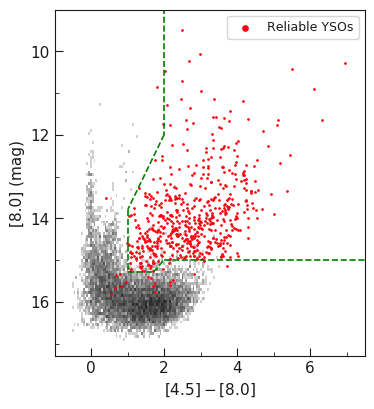

In [405]:
#4580 Spitzer
#Defining the magnitude and color
color = data['k45mag'][idx_4580]-data['k80mag'][idx_4580] 
mag2= data['k80mag'][idx_4580]

#Defining the edges of the 2D histogram for the Hess diagram  - makesure this matches your plot imits or is just smaller than
coledges = np.linspace(-2.0, 8, 200) #(min, max, nbins)
magedges = np.linspace(4, 18, 200)
extent = [coledges[0], coledges[-1], magedges[-1], magedges[0]]

plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=11)
plt.rc("ytick", labelsize=11)
plt.rc("axes", labelsize=11)
plt.rc("legend", fontsize=11)
# plt.rcdefaults()                    # Resets the parameters to their default values

#2D histogram
numH = np.histogram2d(mag2,color,bins=(magedges, coledges))
numH[0][numH[0] == 0] = np.nan
numH=np.log10(numH[0])*0.9         #logging it to show features, but you can use any stretch you like.

#Setting up figure, 6"x5" in this case
fig = plt.figure(figsize=(4,4.5))

plt.clf()      #clears plot area
ax = plt.gca() #sets up active plot region

#Set up plot window: limits, titles, etc. Note the "ax" that was defined earlier.
plt.setp(ax,xlim=[-1,7.5],
         ylim=[17.3,9],
         xlabel='$[4.5] - [8.0]$',
         ylabel='[8.0] (mag)')

x_majors=[0,2,4,6,8,12]
y_majors=np.linspace(8, 18,6)
ax.xaxis.set_major_locator(matplotlib.ticker.FixedLocator(x_majors))
ax.yaxis.set_major_locator(matplotlib.ticker.FixedLocator(y_majors))
x_minors = np.linspace(-2, 8, 11)[1:-1]
ax.xaxis.set_minor_locator(matplotlib.ticker.FixedLocator(x_minors))
y_minors = np.linspace(8, 20, 13)[1:-1]
ax.yaxis.set_minor_locator(matplotlib.ticker.FixedLocator(y_minors))
plt.tick_params(which='minor',direction='in',length=3)
plt.tick_params(which='major',direction='in',length=6)

#Show the image (the 2D histogram)
im = ax.imshow(numH,extent=extent,interpolation='nearest',
            vmin=0,vmax=1000,aspect='auto')

im.set_clim(0,1.5)         #clipping values of the image to show.
im.set_cmap('gist_yarg')   #choosing a color map

#Plot all potential YSOs making the cut
#plt.scatter(data['k45mag'][c4_idx]-data['k80mag'][c4_idx], data['k80mag'][c4_idx], s=0.9,color=sns.xkcd_rgb['bright purple'], label="YSO candidates")
# Plot all reliable stars which satify the cut criteria
plt.scatter(reliable_score_cat['k45mag'][rel_idx_4580]-reliable_score_cat['k80mag'][rel_idx_4580], reliable_score_cat['k80mag'][rel_idx_4580], s=0.9,color=sns.xkcd_rgb['bright red'], label="Reliable YSOs")

lines=([2,2],[6,7.7+mod],[2,1],[7.7+mod,9.5+mod],[1,1],[9.5+mod,11+mod],[1,1.7],[11+mod,11+mod],[1.7,2],[11+mod,10.7+mod],[2,8],[10.7+mod,10.7+mod])
lim=int(0.5*len(lines))
for i in range(lim):
    x,y=lines[2*i],lines[2*i+1]
    plt.plot(x,y,'--',color='green',linewidth=1.2)

# Add a legend and a title
plt.legend(loc="upper right",frameon=True, scatterpoints=1, numpoints=1, markerscale=4,fontsize=9)
plt.savefig("45_80_Hess.pdf", bbox_inches='tight')

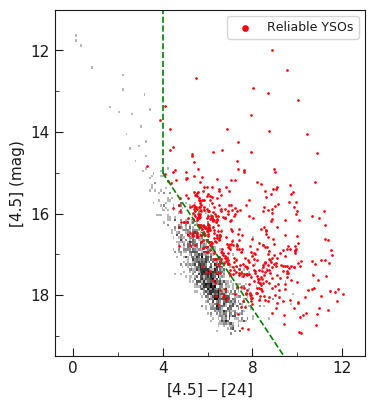

In [406]:
#4524 Spitzer
#Defining the magnitude and color
color = data['k45mag'][idx_4524]-data['k24mag'][idx_4524]
mag2= data['k45mag'][idx_4524]

#Defining the edges of the 2D histogram for the Hess diagram  - makesure this matches your plot imits or is just smaller than
coledges = np.linspace(-2.0, 14, 200) #(min, max, nbins)
magedges = np.linspace(8, 20, 200)
extent = [coledges[0], coledges[-1], magedges[-1], magedges[0]]

plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=11)
plt.rc("ytick", labelsize=11)
plt.rc("axes", labelsize=11)
plt.rc("legend", fontsize=11)
# plt.rcdefaults()                    # Resets the parameters to their default values

#2D histogram
numH = np.histogram2d(mag2,color,bins=(magedges, coledges))
numH[0][numH[0] == 0] = np.nan
numH=np.log10(numH[0])*1.4         #logging it to show features, but you can use any stretch you like.

#Setting up figure, 6"x5" in this case
fig = plt.figure(figsize=(4,4.5))

plt.clf()      #clears plot area
ax = plt.gca() #sets up active plot region

#Set up plot window: limits, titles, etc. Note the "ax" that was defined earlier.
plt.setp(ax,xlim=[-0.8,13],
         ylim=[19.5,11],
         xlabel='$[4.5] - [24]$',
         ylabel='[4.5] (mag)')

x_majors=[0,4,8,12]
y_majors=np.linspace(8, 18,6)
ax.xaxis.set_major_locator(matplotlib.ticker.FixedLocator(x_majors))
ax.yaxis.set_major_locator(matplotlib.ticker.FixedLocator(y_majors))
x_minors = np.linspace(0, 12, 7)[1:-1]
ax.xaxis.set_minor_locator(matplotlib.ticker.FixedLocator(x_minors))
y_minors = np.linspace(8, 20, 13)[1:-1]
ax.yaxis.set_minor_locator(matplotlib.ticker.FixedLocator(y_minors))
plt.tick_params(which='minor',direction='in',length=3)
plt.tick_params(which='major',direction='in',length=6)

#Show the image (the 2D histogram)
im = ax.imshow(numH,extent=extent,interpolation='nearest',
            vmin=0,vmax=1000,aspect='auto')

im.set_clim(0,1.5)         #clipping values of the image to show.
im.set_cmap('gist_yarg')   #choosing a color map

#Plot all potential YSOs making the cut
#plt.scatter(data['k45mag'][c5_idx]-data['k24mag'][c5_idx], data['k45mag'][c5_idx], s=0.9,color=sns.xkcd_rgb['bright purple'], label="YSO candidates")
# Plot all reliable stars which satify the cut criteria
plt.scatter(reliable_score_cat['k45mag'][rel_idx_4524]-reliable_score_cat['k24mag'][rel_idx_4524], reliable_score_cat['k45mag'][rel_idx_4524], s=0.9,color=sns.xkcd_rgb['bright red'], label="Reliable YSOs")

lines=([4,4],[8,15],[4,10],[15,20])
lim=int(0.5*len(lines))
for i in range(lim):
    x,y=lines[2*i],lines[2*i+1]
    plt.plot(x,y,'--',color='green',linewidth=1.2)

# Add a legend and a title
plt.legend(loc="upper right",frameon=True, scatterpoints=1, numpoints=1, markerscale=4,fontsize=9)
plt.savefig("45_24_Hess.pdf", bbox_inches='tight')

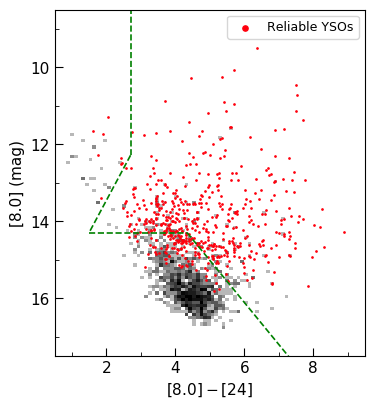

In [40]:
#8024 Spitzer
#Defining the magnitude and color
color = data['k80mag'][idx_8024]-data['k24mag'][idx_8024]
mag2= data['k80mag'][idx_8024]

#Defining the edges of the 2D histogram for the Hess diagram  - makesure this matches your plot imits or is just smaller than
coledges = np.linspace(-4.0, 12, 150) #(min, max, nbins)
magedges = np.linspace(6, 18, 150)
extent = [coledges[0], coledges[-1], magedges[-1], magedges[0]]

plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=11)
plt.rc("ytick", labelsize=11)
plt.rc("axes", labelsize=11)
plt.rc("legend", fontsize=11)
# plt.rcdefaults()                    # Resets the parameters to their default values

#2D histogram
numH = np.histogram2d(mag2,color,bins=(magedges, coledges))
numH[0][numH[0] == 0] = np.nan
numH=np.log10(numH[0])*1.4         #logging it to show features, but you can use any stretch you like.

#Setting up figure, 6"x5" in this case
fig = plt.figure(figsize=(4,4.5))

plt.clf()      #clears plot area
ax = plt.gca() #sets up active plot region

#Set up plot window: limits, titles, etc. Note the "ax" that was defined earlier.
plt.setp(ax,xlim=[0.5,9.5],
         ylim=[17.5,8.5],
         xlabel='$[8.0] - [24]$',
         ylabel='[8.0] (mag)')

x_majors=[0,2,4,6,8,10]
y_majors=np.linspace(8, 18,6)
ax.xaxis.set_major_locator(matplotlib.ticker.FixedLocator(x_majors))
ax.yaxis.set_major_locator(matplotlib.ticker.FixedLocator(y_majors))
x_minors = np.linspace(-2, 10, 13)[1:-1]
ax.xaxis.set_minor_locator(matplotlib.ticker.FixedLocator(x_minors))
y_minors = np.linspace(8, 18, 11)[1:-1]
ax.yaxis.set_minor_locator(matplotlib.ticker.FixedLocator(y_minors))
plt.tick_params(which='minor',direction='in',length=3)
plt.tick_params(which='major',direction='in',length=6)

#Show the image (the 2D histogram)
im = ax.imshow(numH,extent=extent,interpolation='nearest',
            vmin=0,vmax=1000,aspect='auto')

im.set_clim(0,1.5)         #clipping values of the image to show.
im.set_cmap('gist_yarg')   #choosing a color map

#Plot all potential YSOs making the cut
#plt.scatter(data['k80mag'][c6_idx]-data['k24mag'][c6_idx], data['k80mag'][c6_idx], s=0.9,color=sns.xkcd_rgb['bright purple'], label="YSO candidates")
# Plot all reliable stars which satify the cut criteria
plt.scatter(reliable_score_cat['k80mag'][rel_idx_8024]-reliable_score_cat['k24mag'][rel_idx_8024], reliable_score_cat['k80mag'][rel_idx_8024], s=0.9,color=sns.xkcd_rgb['bright red'], label="Reliable YSOs")

lines=([2.7,2.7],[6,12.281],[2.7,1.497],[12.281,10+mod],[1.497,4.34],[10+mod,10+mod],[4.34,7.74],[10+mod,18])
lim=int(0.5*len(lines))
for i in range(lim):
    x,y=lines[2*i],lines[2*i+1]
    plt.plot(x,y,'--',color='green',linewidth=1.2)

# Add a legend and a title
plt.legend(loc="upper right",frameon=True, scatterpoints=1, numpoints=1, markerscale=4,fontsize=9)
#plt.savefig("80_24_Hess.pdf", bbox_inches='tight')

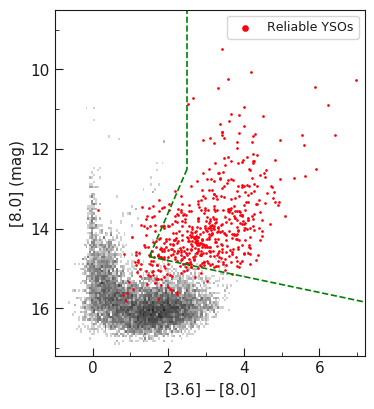

In [408]:
#3680 Spitzer
#Defining the magnitude and color
color = data['k36mag'][idx_3680]-data['k80mag'][idx_3680]
mag2= data['k80mag'][idx_3680]

#Defining the edges of the 2D histogram for the Hess diagram  - makesure this matches your plot imits or is just smaller than
coledges = np.linspace(-2.0, 8, 200) #(min, max, nbins)
magedges = np.linspace(6, 18, 200)
extent = [coledges[0], coledges[-1], magedges[-1], magedges[0]]

plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=11)
plt.rc("ytick", labelsize=11)
plt.rc("axes", labelsize=11)
plt.rc("legend", fontsize=11)
# plt.rcdefaults()                    # Resets the parameters to their default values

#2D histogram
numH = np.histogram2d(mag2,color,bins=(magedges, coledges))
numH[0][numH[0] == 0] = np.nan
numH=np.log10(numH[0])*0.9          #logging it to show features, but you can use any stretch you like.

#Setting up figure, 6"x5" in this case
fig = plt.figure(figsize=(4,4.5))

plt.clf()      #clears plot area
ax = plt.gca() #sets up active plot region

#Set up plot window: limits, titles, etc. Note the "ax" that was defined earlier.
plt.setp(ax,xlim=[-1,7.2],
         ylim=[17.2,8.5],
         xlabel='$[3.6] - [8.0]$',
         ylabel='[8.0] (mag)')

x_majors=[0,2,4,6,8]
y_majors=np.linspace(8, 18,6)
ax.xaxis.set_major_locator(matplotlib.ticker.FixedLocator(x_majors))
ax.yaxis.set_major_locator(matplotlib.ticker.FixedLocator(y_majors))
x_minors = np.linspace(-2, 8, 11)[1:-1]
ax.xaxis.set_minor_locator(matplotlib.ticker.FixedLocator(x_minors))
y_minors = np.linspace(8, 18, 11)[1:-1]
ax.yaxis.set_minor_locator(matplotlib.ticker.FixedLocator(y_minors))
plt.tick_params(which='minor',direction='in',length=3)
plt.tick_params(which='major',direction='in',length=6)

#Show the image (the 2D histogram)
im = ax.imshow(numH,extent=extent,interpolation='nearest',
            vmin=0,vmax=1000,aspect='auto')

im.set_clim(0,1.5)         #clipping values of the image to show.
im.set_cmap('gist_yarg')   #choosing a color map

#Plot all potential YSOs making the cut
#plt.scatter(data['k36mag'][c9_idx]-data['k80mag'][c9_idx], data['k80mag'][c9_idx], s=0.9,color=sns.xkcd_rgb['bright purple'], label="YSO candidates")
# Plot all reliable stars which satify the cut criteria
plt.scatter(reliable_score_cat['k36mag'][rel_idx_3680]-reliable_score_cat['k80mag'][rel_idx_3680], reliable_score_cat['k80mag'][rel_idx_3680], s=0.9,color=sns.xkcd_rgb['bright red'], label="Reliable YSOs")

lines=([2.5,2.5],[6,12.5],[2.5,1.5],[12.5,14.7],[1.5,8],[14.7,16])
lim=int(0.5*len(lines))
for i in range(lim):
    x,y=lines[2*i],lines[2*i+1]
    plt.plot(x,y,'--',color='green',linewidth=1.2)

# Add a legend and a title
plt.legend(loc="upper right",frameon=True, scatterpoints=1, numpoints=1, markerscale=4,fontsize=9)
plt.savefig("36_80_Hess.pdf", bbox_inches='tight')

# CMDs for 0 out of 5

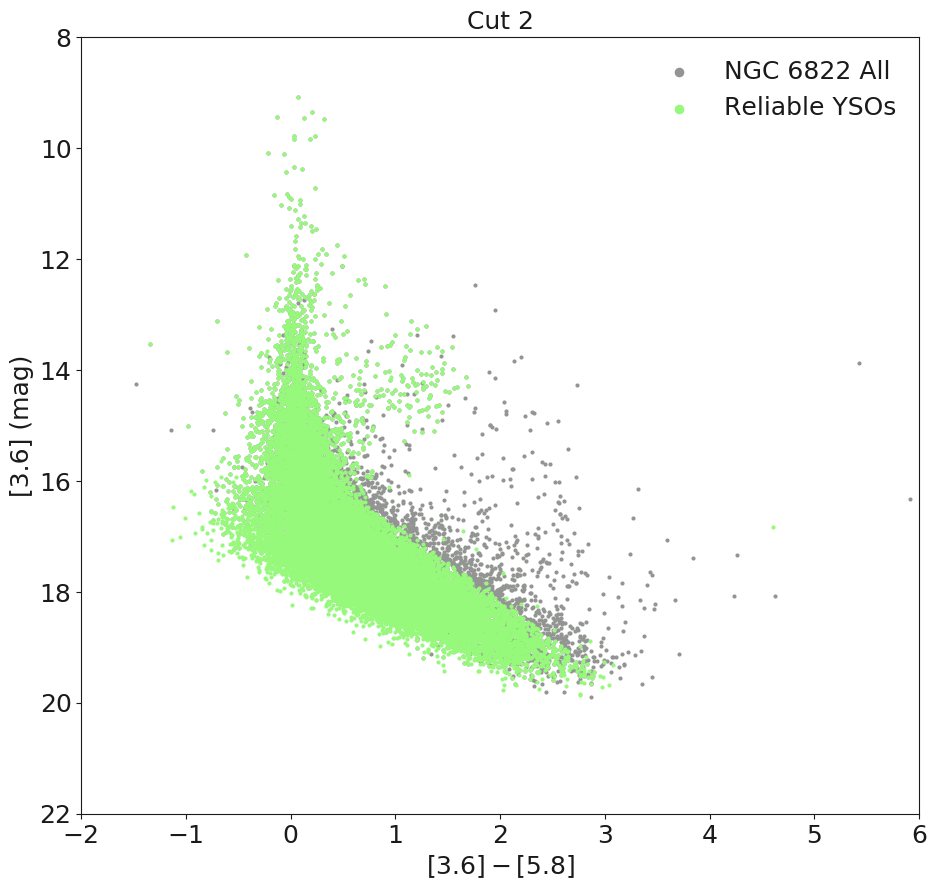

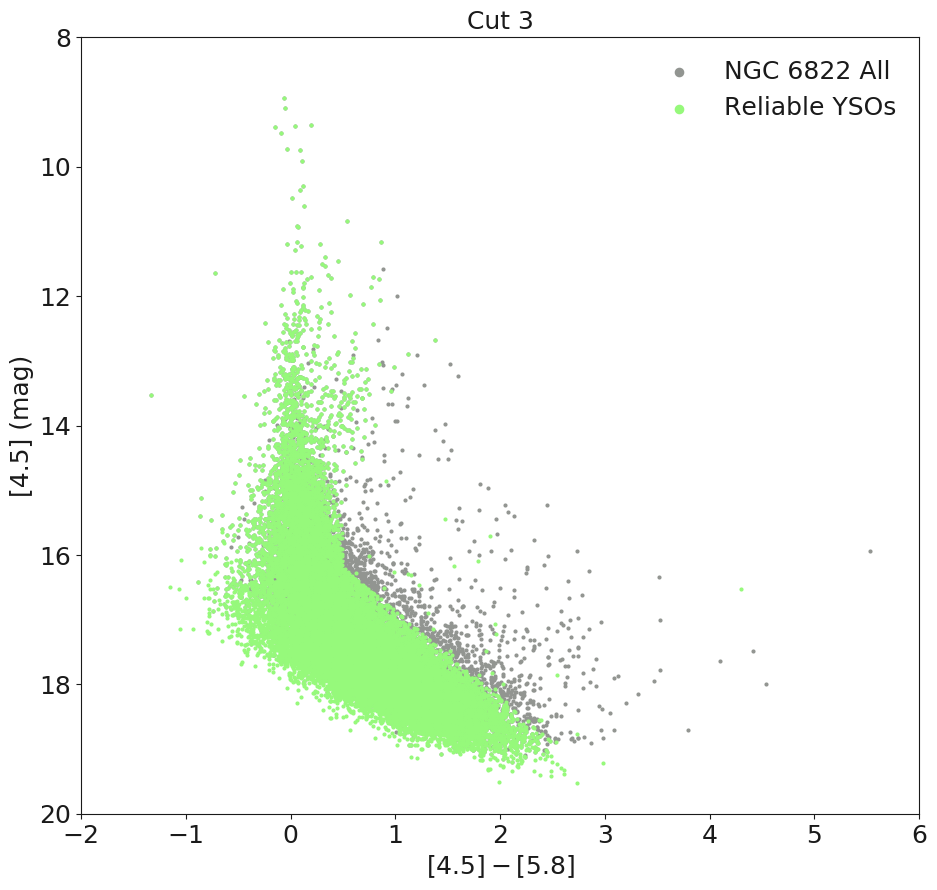

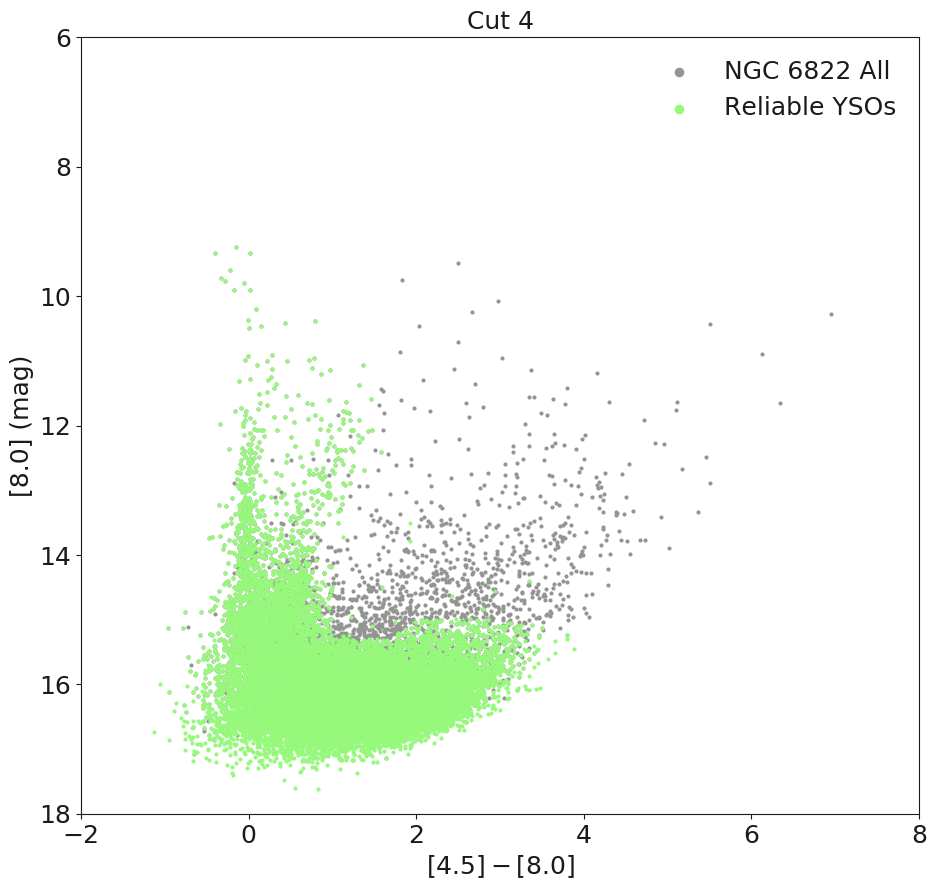

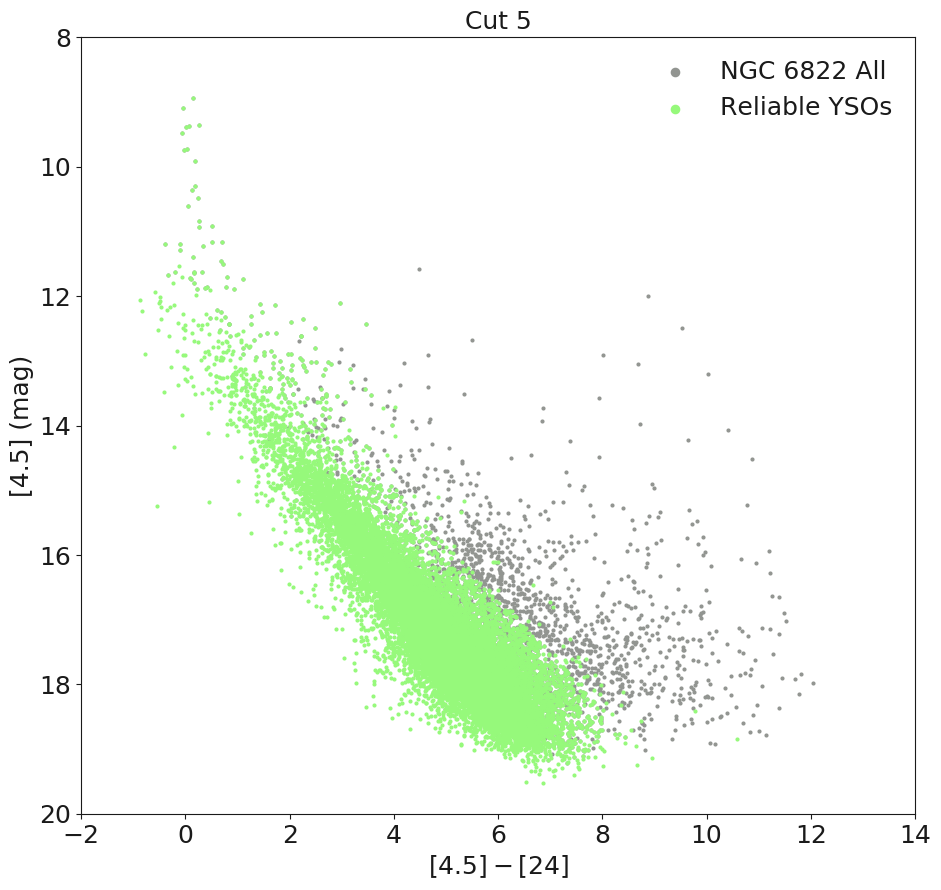

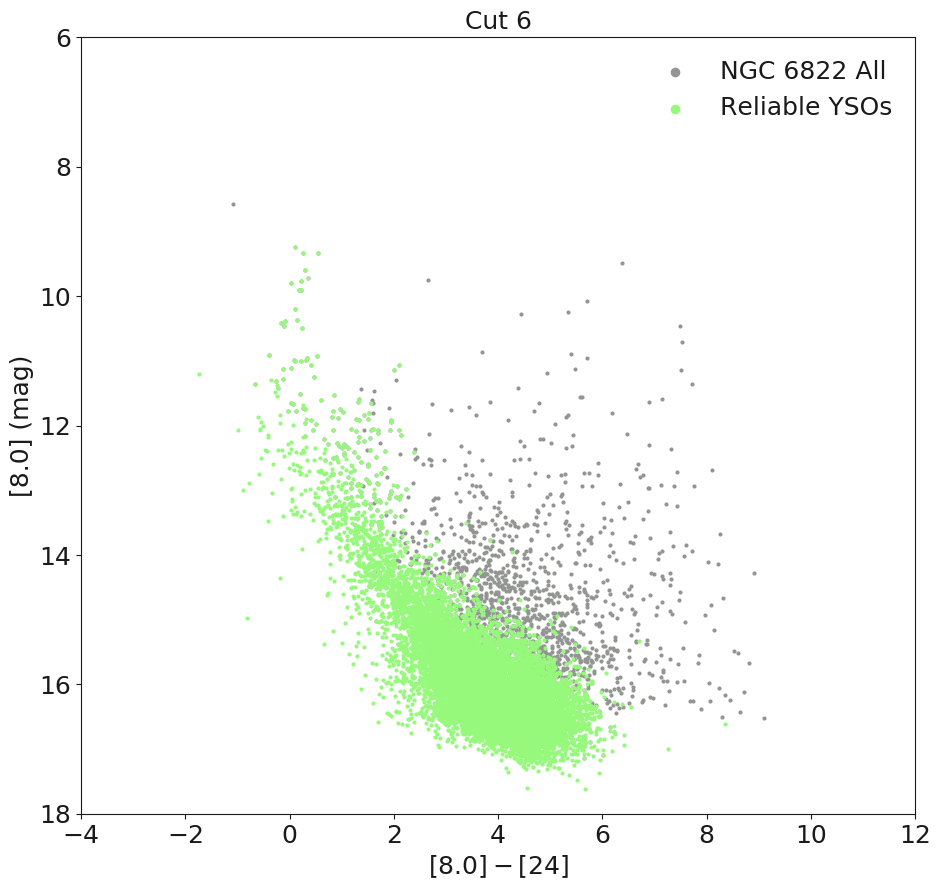

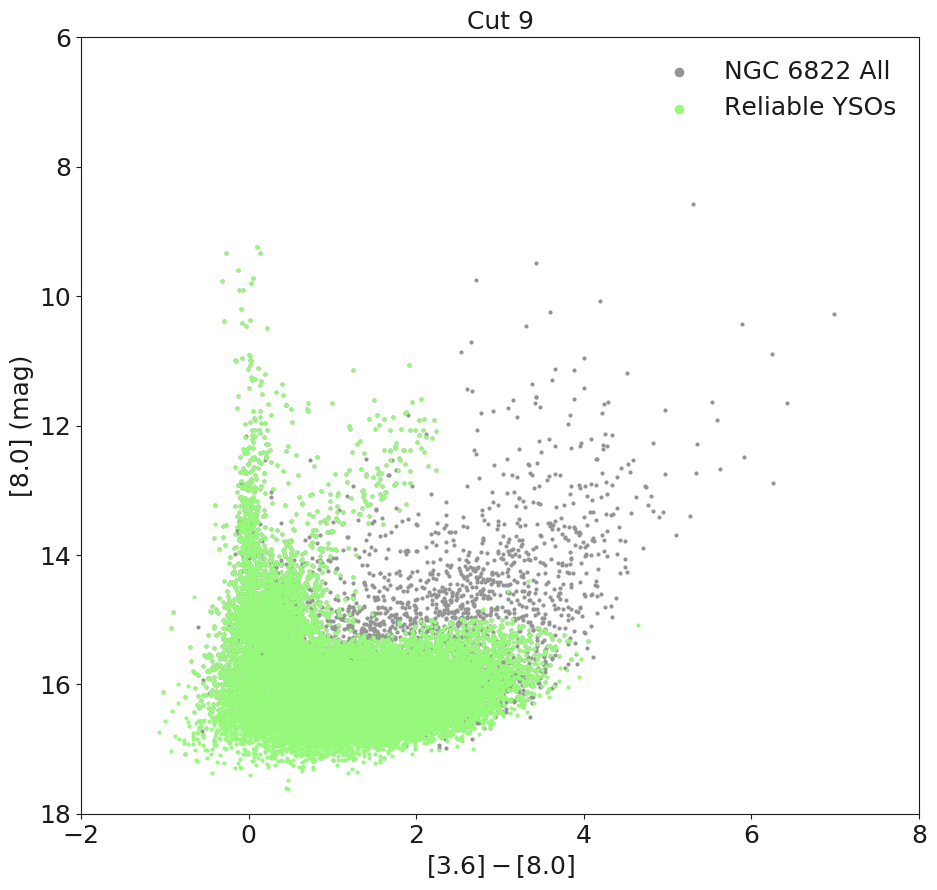

In [409]:
def CMD_0(A,B,C,bgd_idx,all_idx,sp_idx,num,xlabel,ylabel,xlim,ylim):
    # Setting up plotting sizes
    # plt.rc("text",  usetex=True)         # Allows latex commands
    plt.rcParams.update(plt.rcParamsDefault)       #Keeps the background white
    plt.rc('font', family='sans-serif')
    plt.rc("xtick", labelsize=18)
    plt.rc("ytick", labelsize=18)
    plt.rc("axes", labelsize=18)
    plt.rc("legend", fontsize=18)
    # plt.rcdefaults()                    # Resets the parameters to their default values
    
    # Setting up figure
    plt.figure(figsize=(18,9))
    ax = plt.gca()                        # Sets up active plot region
    
    #Make 1st diagram for 1st reliable catalogue
    plt.subplot(1,2,1)
    # Make the actual plot
    plt.scatter(data[B][bgd_idx]-data[C][bgd_idx], data[A][bgd_idx], s=3.9,color=sns.xkcd_rgb['grey'], label="NGC 6822 All")
    
    # Plot all sensible stars which satify the cut criteria
    #plt.scatter(data[B][all_idx]-data[C][all_idx], data[A][all_idx], s=3.9,color=sns.xkcd_rgb['bright purple'], label="YSO candidates")
    # Plot all reliable stars which satify the cut criteria
    plt.scatter(reliable_cat[B][sp_idx]-reliable_cat[C][sp_idx], reliable_cat[A][sp_idx], s=3.9,color=sns.xkcd_rgb['light green'], label="Reliable YSOs")
    # Plot all probable stars which satify the cut criteria
    
    
    #plt.scatter(score_2_cat[B]-score_2_cat[C], score_2_cat[A], s=3.9,color=sns.xkcd_rgb['light yellow'], label="Probable YSOs")

    
    # Set the axis lables
    plt.xlabel(xlabel, fontsize=18)
    plt.ylabel(ylabel, fontsize=18)
    
    # Set limits if automatic values dont work well
    plt.xlim(xlim)      # Set the x-axis limits
    plt.ylim(ylim)           # Set the y-axis limits NB Smaller numbers are bighter in magnitudes so flip max/min values

    
    # Add a legend and a title
    plt.legend(loc="upper right",frameon=False, scatterpoints=1, numpoints=1, markerscale=3.)
    plt.title('Cut '+num, fontsize=18)
    
    #plt.savefig("bla.pdf", bbox_inches='tight')    # Saves the figure is uncommented
    plt.tight_layout()
    plt.show()
    plt.close()


CMD_0('k36mag','k36mag','k58mag',idx_3658,c2_idx,idx_YSO_score_0,'2','$[3.6] -[5.8]$','[3.6] (mag)',(-2,6),(22,8))
CMD_0('k45mag','k45mag','k58mag',idx_4558,c3_idx,idx_YSO_score_0,'3','$[4.5] -[5.8]$','[4.5] (mag)',(-2,6),(20,8))
CMD_0('k80mag','k45mag','k80mag',idx_4580,c4_idx,idx_YSO_score_0,'4','$[4.5] -[8.0]$','[8.0] (mag)',(-2,8),(18,6))
CMD_0('k45mag','k45mag','k24mag',idx_4524,c5_idx,idx_YSO_score_0,'5','$[4.5] -[24]$','[4.5] (mag)',(-2,14),(20,8))
CMD_0('k80mag','k80mag','k24mag',idx_8024,c6_idx,idx_YSO_score_0,'6','$[8.0] -[24]$','[8.0] (mag)',(-4,12),(18,6))
CMD_0('k80mag','k36mag','k80mag',idx_3680,c9_idx,idx_YSO_score_0,'9','$[3.6] -[8.0]$','[8.0] (mag)',(-2,8),(18,6))


# CMDs for the reliably-scored sources within the box

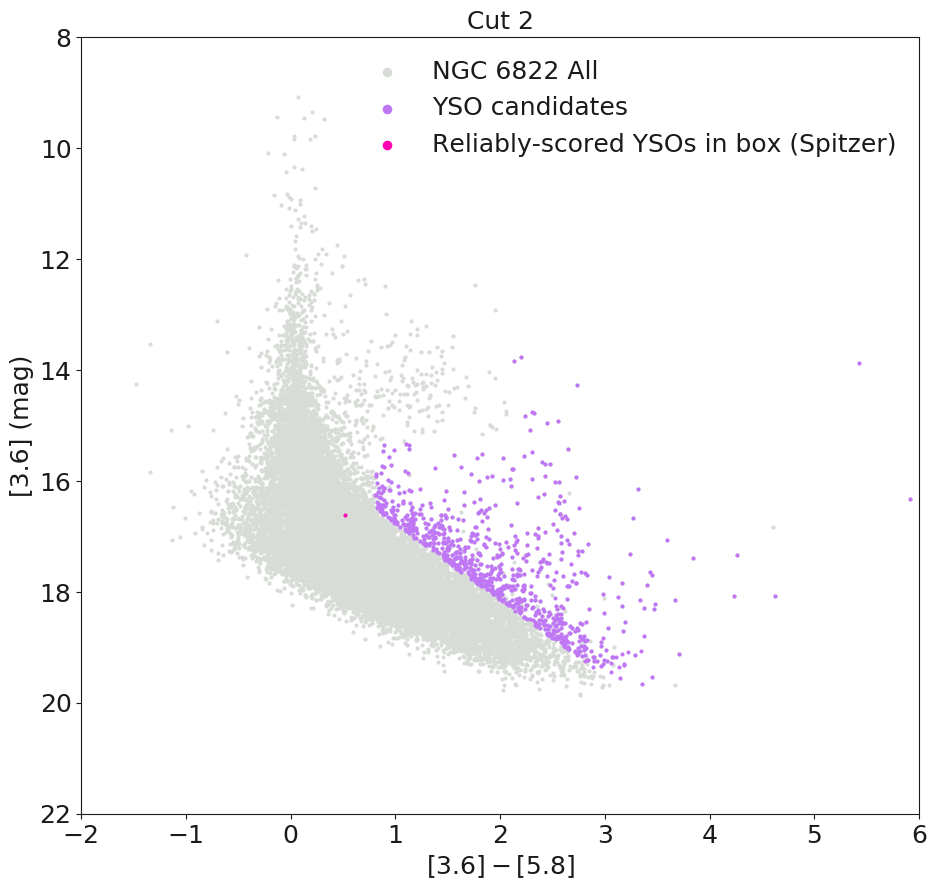

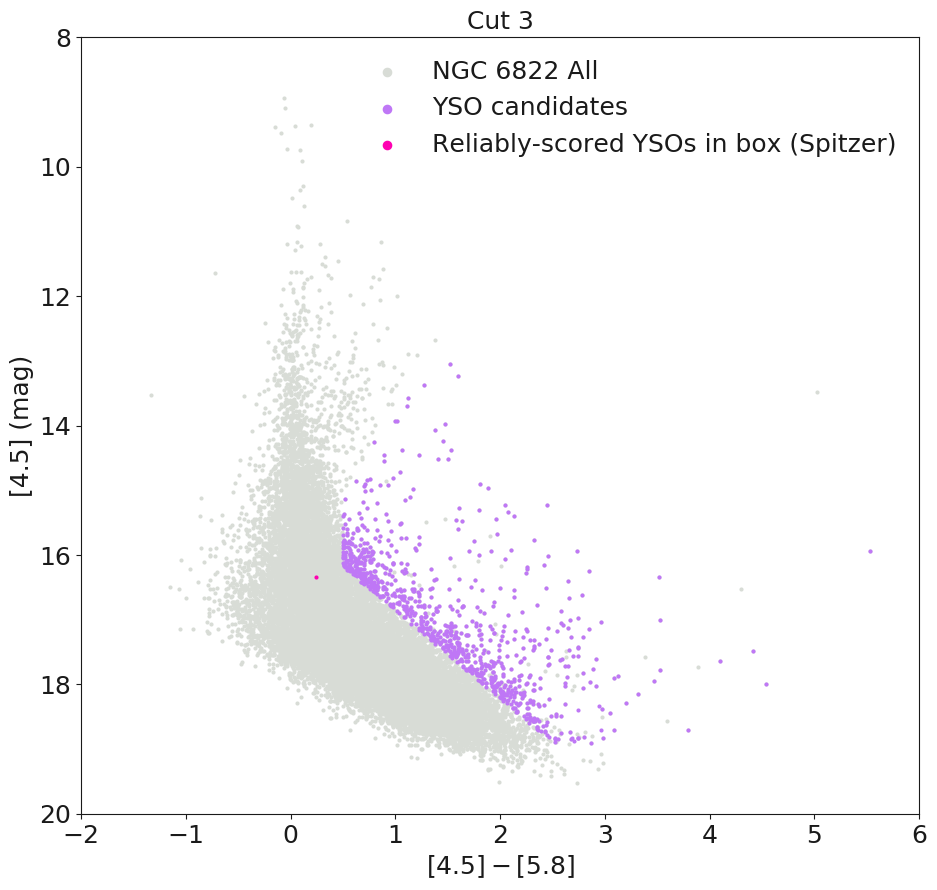

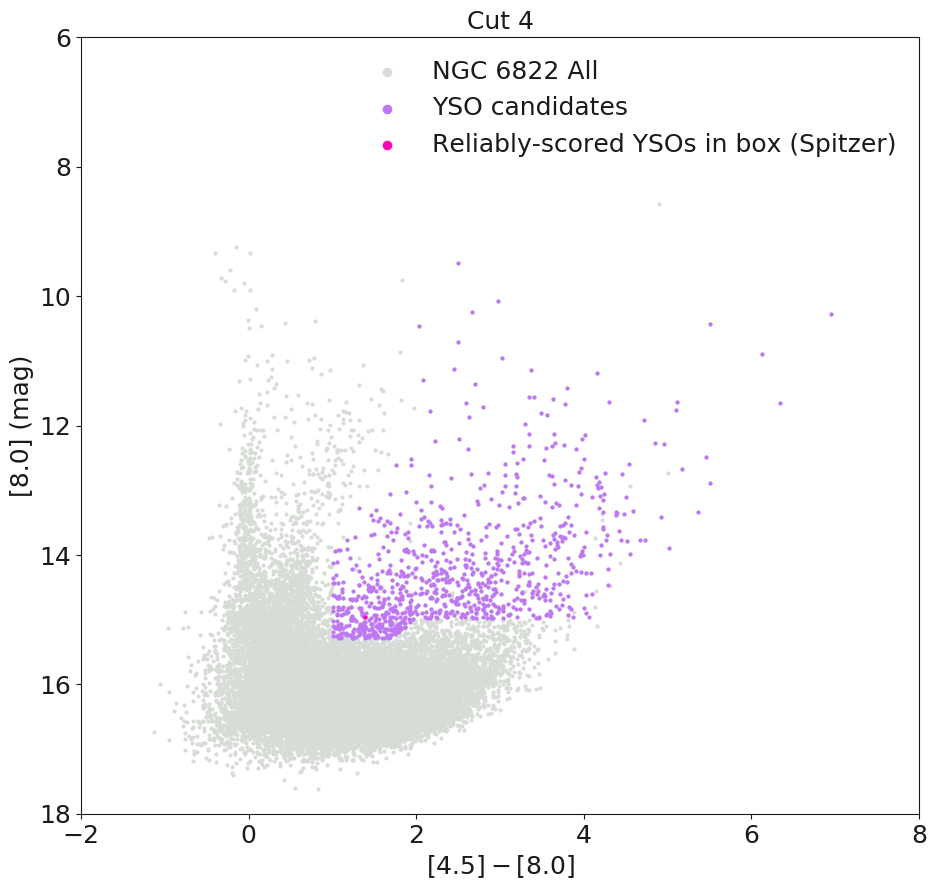

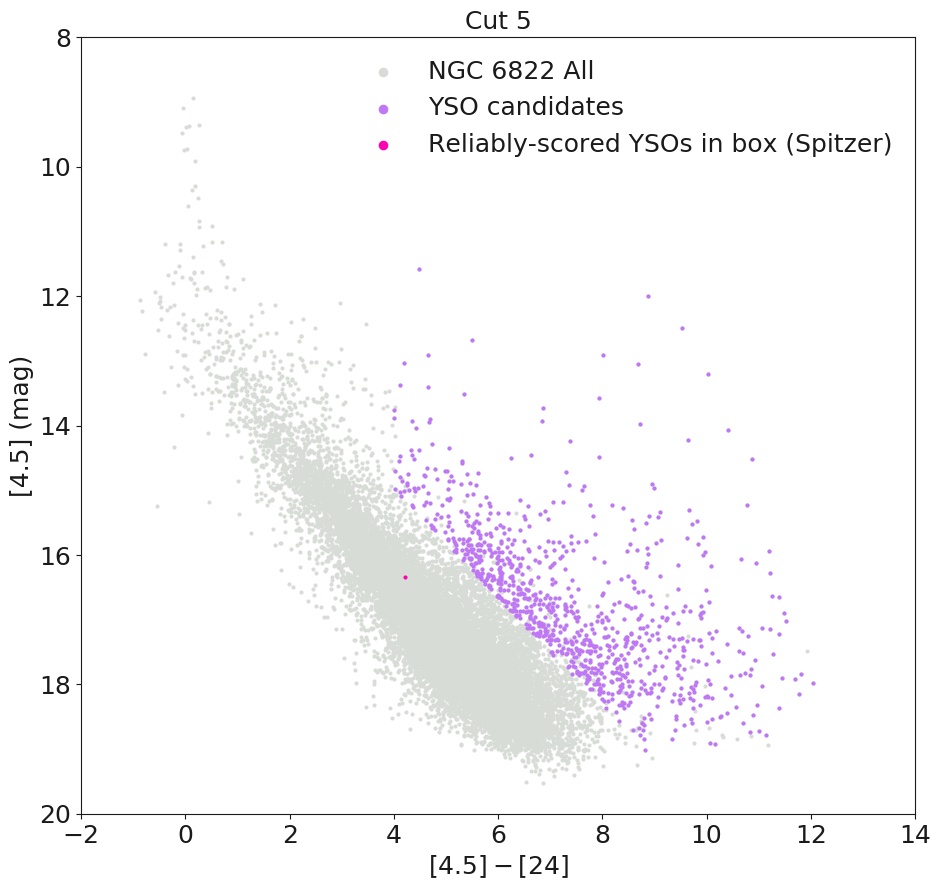

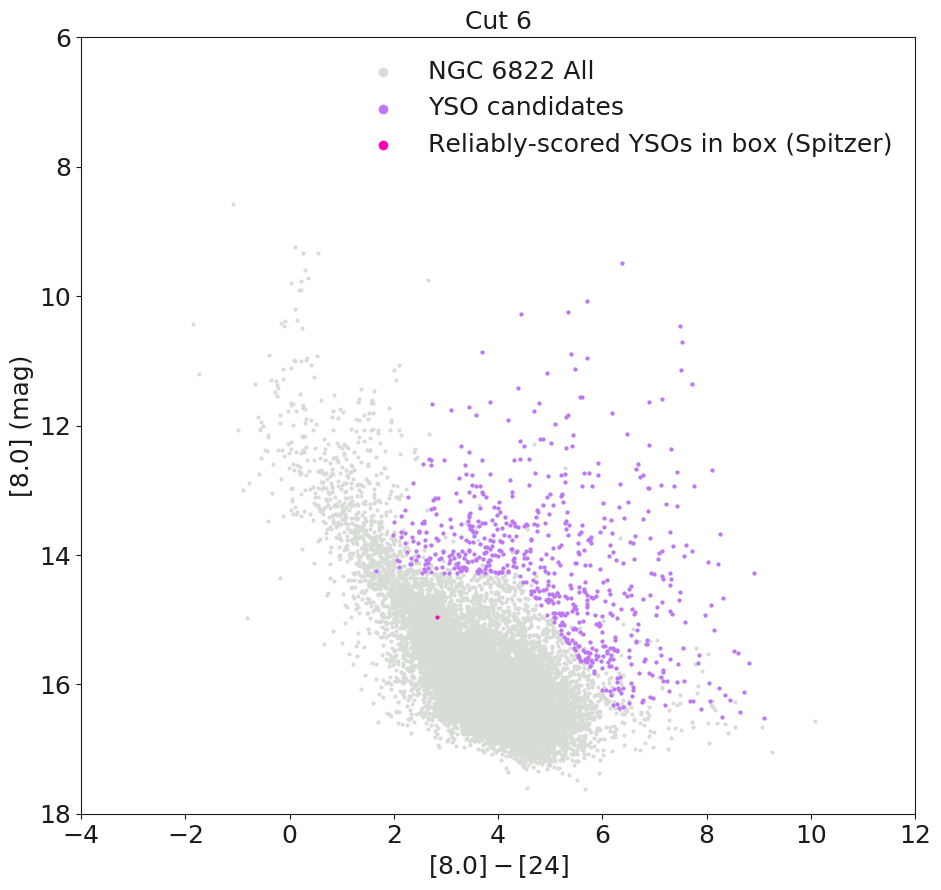

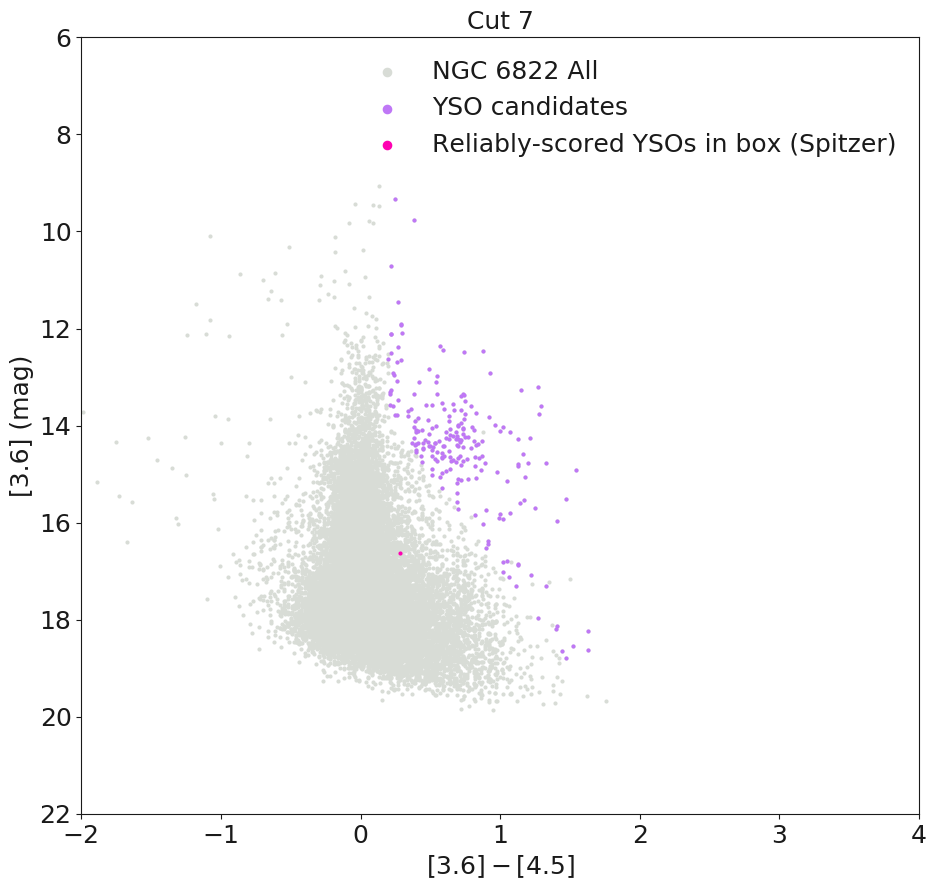

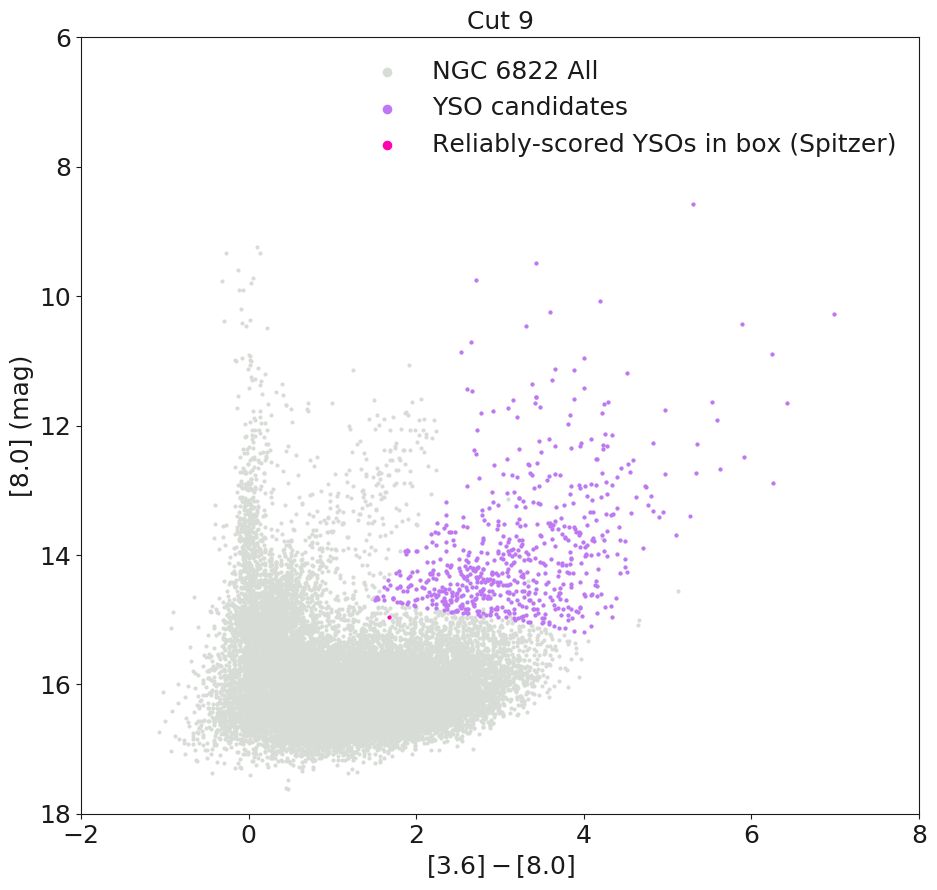

In [410]:
def CMD_var(A,B,C,all_idx,sp_idx,num,xlabel,ylabel,xlim,ylim):
    # Setting up plotting sizes
    # plt.rc("text",  usetex=True)         # Allows latex commands
    plt.rcParams.update(plt.rcParamsDefault)       #Keeps the background white
    plt.rc('font', family='sans-serif')
    plt.rc("xtick", labelsize=18)
    plt.rc("ytick", labelsize=18)
    plt.rc("axes", labelsize=18)
    plt.rc("legend", fontsize=18)
    # plt.rcdefaults()                    # Resets the parameters to their default values
    
    # Setting up figure
    plt.figure(figsize=(18,9))
    ax = plt.gca()                        # Sets up active plot region
    
    #Make 1st diagram for 1st reliable catalogue
    plt.subplot(1,2,1)
    # Make the actual plot
    plt.scatter(reliable_cat[B]-reliable_cat[C], reliable_cat[A], s=3.9,color=sns.xkcd_rgb['light grey'], label="NGC 6822 All")
    
    # Plot all sensible stars which satify the cut criteria
    plt.scatter(data[B][all_idx]-data[C][all_idx], data[A][all_idx], s=3.9,color=sns.xkcd_rgb['light purple'], label="YSO candidates")
    # Plot all reliable stars which satify the cut criteria
    plt.scatter(data[B][sp_idx]-data[C][sp_idx], data[A][sp_idx], s=3.9,color=sns.xkcd_rgb['bright pink'], label="Reliably-scored YSOs in box (Spitzer)")
    
    # Set the axis lables
    plt.xlabel(xlabel, fontsize=18)
    plt.ylabel(ylabel, fontsize=18)
    
    # Set limits if automatic values dont work well
    plt.xlim(xlim)      # Set the x-axis limits
    plt.ylim(ylim)           # Set the y-axis limits NB Smaller numbers are bighter in magnitudes so flip max/min values

    
    # Add a legend and a title
    plt.legend(loc="upper right",frameon=False, scatterpoints=1, numpoints=1, markerscale=3.)
    plt.title('Cut '+num, fontsize=18)
    
    #plt.savefig("bla.pdf", bbox_inches='tight')    # Saves the figure is uncommented
    plt.tight_layout()
    plt.show()
    plt.close()
    
    '''
    #Make 2nd diagram for 2nd reliable catalogue
    plt.subplot(1,2,2)
    # Make the actual plot
    plt.scatter(reliable_cat[B]-reliable_cat[C], reliable_cat[A], s=3.9,color=sns.xkcd_rgb['light grey'], label="NGC 6822 All")
    
    # Plot all sensible stars which satify the cut criteria
    plt.scatter(data[B][all_idx]-data[C][all_idx], data[A][all_idx], s=3.9,color=sns.xkcd_rgb['light purple'], label="YSO candidates")
    # Plot all reliable stars which satify the cut criteria
    plt.scatter(data[B][HJK_idx]-data[C][HJK_idx], data[A][HJK_idx], s=3.9,color=sns.xkcd_rgb['bright pink'], label="Reliably-scored YSOs in box (JHK)")
    
    # Set the axis lables
    plt.xlabel(xlabel, fontsize=18)
    plt.ylabel(ylabel, fontsize=18)
    
    # Set limits if automatic values dont work well
    plt.xlim(xlim)      # Set the x-axis limits
    plt.ylim(ylim)           # Set the y-axis limits NB Smaller numbers are bighter in magnitudes so flip max/min values

    
    # Add a legend and a title
    plt.legend(loc="upper right",frameon=False, scatterpoints=1, numpoints=1, markerscale=3.)
    plt.title('Cut '+num+': 2nd catalogue (JHK)', fontsize=18)
    '''

CMD_var('k36mag','k36mag','k58mag',c2_idx,box_idx,'2','$[3.6] -[5.8]$','[3.6] (mag)',(-2,6),(22,8))
CMD_var('k45mag','k45mag','k58mag',c3_idx,box_idx,'3','$[4.5] -[5.8]$','[4.5] (mag)',(-2,6),(20,8))
CMD_var('k80mag','k45mag','k80mag',c4_idx,box_idx,'4','$[4.5] -[8.0]$','[8.0] (mag)',(-2,8),(18,6))
CMD_var('k45mag','k45mag','k24mag',c5_idx,box_idx,'5','$[4.5] -[24]$','[4.5] (mag)',(-2,14),(20,8))
CMD_var('k80mag','k80mag','k24mag',c6_idx,box_idx,'6','$[8.0] -[24]$','[8.0] (mag)',(-4,12),(18,6))
CMD_var('k36mag','k36mag','k45mag',c7_idx,box_idx,'7','$[3.6] -[4.5]$','[3.6] (mag)',(-2,4),(22,6))
CMD_var('k80mag','k36mag','k80mag',c9_idx,box_idx,'9','$[3.6] -[8.0]$','[8.0] (mag)',(-2,8),(18,6))

# CCDs

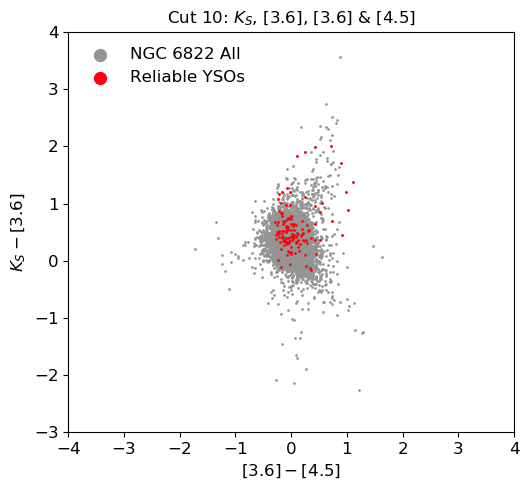

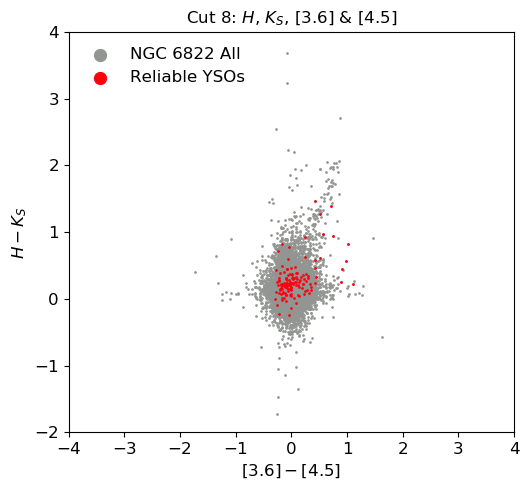

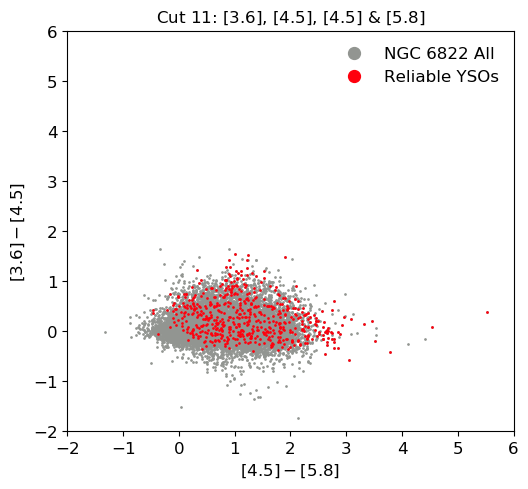

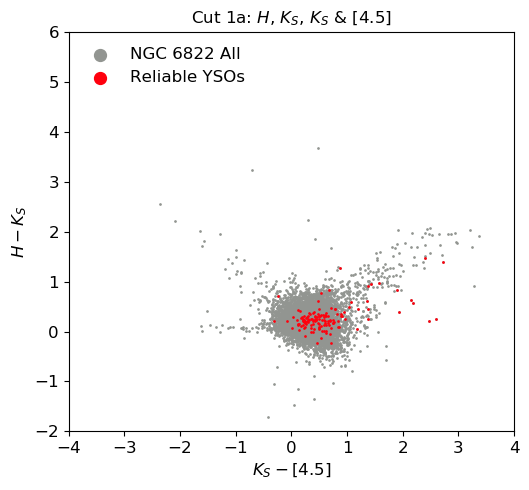

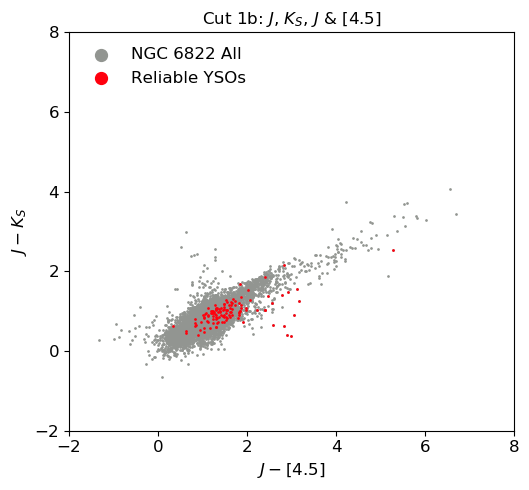

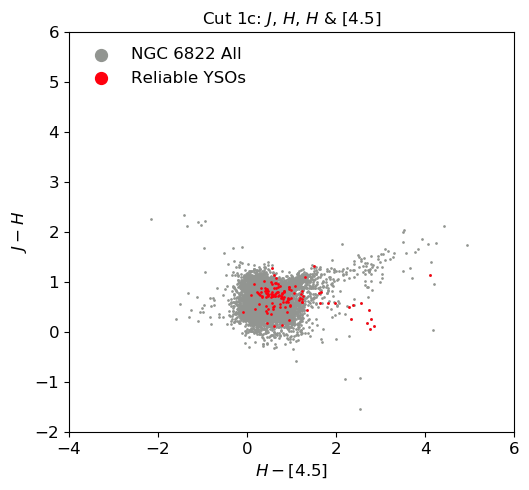

In [151]:
#CCDs
#produce CCD for [a]-[b]vs.[c]-[d] with corresponding column titles

def ccd(cut,A,B,C,D,bgd_idx,cut_idx,a,b,c,d,xlimits,ylimits,pos):
    # Setting up plotting sizes
    plt.rc('font', family='sans-serif')
    # plt.rc("text",  usetex=True)         # Allows latex commands
    plt.rc("xtick", labelsize=12)
    plt.rc("ytick", labelsize=12)
    plt.rc("axes", labelsize=12)
    plt.rc("legend", fontsize=12)
    # plt.rcdefaults() # Resets the parameters to their default values

    # Setting up figure
    fig = plt.figure(figsize=(10, 5))
    ax = plt.gca()  # Sets up active plot region

    #Make 1st diagram for 1st reliable catalogue
    plt.subplot(1,2,1)
    # Plot everything
    plt.scatter(data[C][bgd_idx]-data[D][bgd_idx], data[A][bgd_idx]-data[B][bgd_idx], s=0.9,color=sns.xkcd_rgb['grey'], label="NGC 6822 All")

    # Plot 24 flux stars
    #plt.scatter(data[A][MIPS24_idx]-data[B][MIPS24_idx], data[C][MIPS24_idx]-data[D][MIPS24_idx], s=0.9,color=sns.xkcd_rgb['bright yellow'], label="[24] flux")
    # Plot only sensible stars which satify the cut criteria
    #plt.scatter(data[A][cut_idx]-data[B][cut_idx], data[C][cut_idx]-data[D][cut_idx], s=0.9,color=sns.xkcd_rgb['bright purple'], label="YSO candidates")
    #Plot only reliable catalogue
    plt.scatter(reliable_score_cat[C][cut_idx]-reliable_score_cat[D][cut_idx], reliable_score_cat[A][cut_idx]-reliable_score_cat[B][cut_idx], s=0.9,color=sns.xkcd_rgb['bright red'], label="Reliable YSOs")
    
    plt.xlim(xlimits[0],xlimits[1])
    plt.ylim(ylimits[0],ylimits[1])
    
    # Set the axis lables
    x_label = '$'+c+' - '+d+'$'
    y_label = '$'+a+' - '+b+'$'
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)

    # Add a legend and a title
    plt.legend(loc=pos,frameon=False, scatterpoints=1, numpoints=1, markerscale=9.)
    plt.title('Cut '+cut+': $'+a+'$, $'+b+'$, $'+c+'$ & $'+d+'$',fontsize=12)
    
    fig.tight_layout()
    #plt.savefig("bla.pdf", bbox_inches='tight')
    plt.show()
    plt.close()
    
    
#random criteria for c10 - we don't care about this really
ccd('10','Kmag','k36mag','k36mag','k45mag',idx_K363645,rel_idx_K363645,'K_S','[3.6]','[3.6]','[4.5]',[-4,4],[-3,4],'upper left')
ccd('8','Hmag','Kmag','k36mag','k45mag',idx_HK3645,rel_idx_HK3645,'H','K_S','[3.6]','[4.5]',[-4,4],[-2,4],'upper left')
ccd('11','k36mag','k45mag','k45mag','k58mag',idx_36454558,rel_idx_36454558,'[3.6]','[4.5]','[4.5]','[5.8]',[-2,6],[-2,6],'upper right')

#1a,b,c
ccd('1a','Hmag','Kmag','Kmag','k45mag',idx_HKK45,rel_idx_HKK45,'H','K_S','K_S','[4.5]',[-4,4],[-2,6],'upper left')
ccd('1b','Jmag','Kmag','Jmag','k45mag',idx_JKJ45,rel_idx_JKJ45,'J','K_S','J','[4.5]',[-2,8],[-2,8],'upper left')
ccd('1c','Jmag','Hmag','Hmag','k45mag',idx_JHH45,rel_idx_JHH45,'J','H','H','[4.5]',[-4,6],[-2,6],'upper left')

# CCD Hess

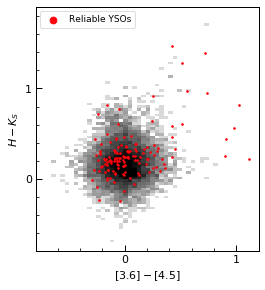

In [24]:
#H K 36 45
#Defining the x and y axes
x_ax = data['k36mag'][idx_HK3645]-data['k45mag'][idx_HK3645]
y_ax= data['Hmag'][idx_HK3645]-data['Kmag'][idx_HK3645]

#Defining the edges of the 2D histogram for the Hess diagram  - makesure this matches your plot imits or is just smaller than
x_edges = np.linspace(-4, 4, 200) #(min, max, nbins)
y_edges = np.linspace(-2, 4, 200)
extent = [x_edges[0], x_edges[-1], y_edges[-1], y_edges[0]]

plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=11)
plt.rc("ytick", labelsize=11)
plt.rc("axes", labelsize=11)
plt.rc("legend", fontsize=11)
# plt.rcdefaults()                    # Resets the parameters to their default values

#2D histogram
numH = np.histogram2d(y_ax,x_ax,bins=(y_edges, x_edges))
numH[0][numH[0] == 0] = np.nan
numH=np.log10(numH[0])*0.75          #logging it to show features, but you can use any stretch you like.

#Setting up figure, 6"x5" in this case
fig = plt.figure(figsize=(4,4.5))

plt.clf()      #clears plot area
ax = plt.gca() #sets up active plot region

#Set up plot window: limits, titles, etc. Note the "ax" that was defined earlier.
plt.setp(ax,xlim=[-0.8,1.2],
         ylim=[-0.8,1.9],
         xlabel='$[3.6] - [4.5]$',
         ylabel='$H - K_S$')

x_majors=[-1,0,1,2,3]
y_majors=[-1,0,1,2,3]
ax.xaxis.set_major_locator(matplotlib.ticker.FixedLocator(x_majors))
ax.yaxis.set_major_locator(matplotlib.ticker.FixedLocator(y_majors))
x_minors = np.linspace(-1, 3, 21)[1:-1]
ax.xaxis.set_minor_locator(matplotlib.ticker.FixedLocator(x_minors))
y_minors = np.linspace(-1, 3, 21)[1:-1]
ax.yaxis.set_minor_locator(matplotlib.ticker.FixedLocator(y_minors))
plt.tick_params(which='minor',direction='in',length=3)
plt.tick_params(which='major',direction='in',length=6)

#Show the image (the 2D histogram)
im = ax.imshow(numH,extent=extent,interpolation='nearest',
            vmin=0,vmax=1000,aspect='auto')

im.set_clim(0,1.5)         #clipping values of the image to show.
im.set_cmap('gist_yarg')   #choosing a color map

#Plot all potential YSOs making the cut
#plt.scatter(data['k36mag'][c9_idx]-data['k80mag'][c9_idx], data['k80mag'][c9_idx], s=0.9,color=sns.xkcd_rgb['bright purple'], label="YSO candidates")
# Plot all reliable stars which satify the cut criteria
plt.scatter(reliable_score_cat['k36mag'][rel_idx_HK3645]-reliable_score_cat['k45mag'][rel_idx_HK3645], reliable_score_cat['Hmag'][rel_idx_HK3645]-reliable_score_cat['Kmag'][rel_idx_HK3645], s=3,color=sns.xkcd_rgb['bright red'], label="Reliable YSOs")

#reliable_cat.show_in_browser(jsviewer=True)

#lines=([2.5,2.5],[6,12.5],[2.5,1.5],[12.5,14.7],[1.5,8],[14.7,16])
#lim=int(0.5*len(lines))
#for i in range(lim):
    #x,y=lines[2*i],lines[2*i+1]
    #plt.plot(x,y,marker='o')

# Add a legend
plt.legend(loc="upper left",frameon=True, scatterpoints=1, numpoints=1, markerscale=4,fontsize=9)
plt.savefig("H_K_36_45_Hess.pdf", bbox_inches='tight')

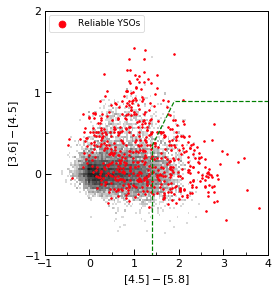

In [32]:
#36 45 45 58
#Defining the x and y axes
x_ax = data['k45mag'][idx_36454558]-data['k58mag'][idx_36454558]
y_ax= data['k36mag'][idx_36454558]-data['k45mag'][idx_36454558]

#Defining the edges of the 2D histogram for the Hess diagram  - makesure this matches your plot imits or is just smaller than
x_edges = np.linspace(-2, 6, 200) #(min, max, nbins)
y_edges = np.linspace(-2, 3, 200)
extent = [x_edges[0], x_edges[-1], y_edges[-1], y_edges[0]]

plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=11)
plt.rc("ytick", labelsize=11)
plt.rc("axes", labelsize=11)
plt.rc("legend", fontsize=11)
# plt.rcdefaults()                    # Resets the parameters to their default values

#2D histogram
numH = np.histogram2d(y_ax,x_ax,bins=(y_edges, x_edges))
numH[0][numH[0] == 0] = np.nan
numH=np.log10(numH[0])*0.75          #logging it to show features, but you can use any stretch you like.

#Setting up figure, 6"x5" in this case
fig = plt.figure(figsize=(4,4.5))

plt.clf()      #clears plot area
ax = plt.gca() #sets up active plot region

#Set up plot window: limits, titles, etc. Note the "ax" that was defined earlier.
plt.setp(ax,xlim=[-1,4],
         ylim=[-1,2],
         xlabel='$[4.5] - [5.8]$',
         ylabel='$[3.6] - [4.5]$')

x_majors=[-2,-1,0,1,2,3,4,5]
y_majors=[-2,-1,0,1,2,3,4]
ax.xaxis.set_major_locator(matplotlib.ticker.FixedLocator(x_majors))
ax.yaxis.set_major_locator(matplotlib.ticker.FixedLocator(y_majors))
x_minors = np.linspace(-2, 5, 15)[1:-1]
ax.xaxis.set_minor_locator(matplotlib.ticker.FixedLocator(x_minors))
y_minors = np.linspace(-2, 5, 15)[1:-1]
ax.yaxis.set_minor_locator(matplotlib.ticker.FixedLocator(y_minors))
plt.tick_params(which='minor',direction='in',length=3)
plt.tick_params(which='major',direction='in',length=6)

#Show the image (the 2D histogram)
im = ax.imshow(numH,extent=extent,interpolation='nearest',vmin=0,vmax=1000,aspect='auto')

im.set_clim(0,1.5)         #clipping values of the image to show.
im.set_cmap('gist_yarg')   #choosing a color map

#Plot all potential YSOs making the cut
#plt.scatter(data['k36mag'][c9_idx]-data['k80mag'][c9_idx], data['k80mag'][c9_idx], s=0.9,color=sns.xkcd_rgb['bright purple'], label="YSO candidates")
# Plot all reliable stars which satify the cut criteria
plt.scatter(reliable_score_cat['k45mag'][rel_idx_36454558]-reliable_score_cat['k58mag'][rel_idx_36454558], reliable_score_cat['k36mag'][rel_idx_36454558]-reliable_score_cat['k45mag'][rel_idx_36454558], s=3,color=sns.xkcd_rgb['bright red'], label="Reliable YSOs")


lines=([1.4,1.4],[-2,0.34],[1.4,1.91],[0.34,0.9],[1.91,10],[0.9,0.9])
lim=int(0.5*len(lines))
for i in range(lim):
    x,y=lines[2*i],lines[2*i+1]
    plt.plot(x,y,'--',color='green',linewidth=1.2)

# Add a legend
plt.legend(loc="upper left",frameon=True, scatterpoints=1, numpoints=1, markerscale=4,fontsize=9)
plt.savefig("36_45_45_58_Hess.pdf", bbox_inches='tight')

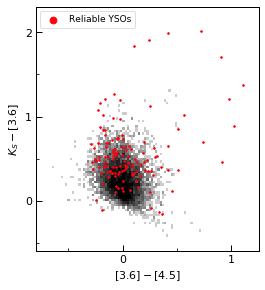

In [173]:
#K 36 36 45
#Defining the x and y axes
x_ax = data['k36mag'][idx_36454558]-data['k45mag'][idx_36454558]
y_ax= data['Kmag'][idx_36454558]-data['k36mag'][idx_36454558]

#Defining the edges of the 2D histogram for the Hess diagram  - makesure this matches your plot imits or is just smaller than
x_edges = np.linspace(-2, 2, 200) #(min, max, nbins)
y_edges = np.linspace(-2, 4, 200)
extent = [x_edges[0], x_edges[-1], y_edges[-1], y_edges[0]]

plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=11)
plt.rc("ytick", labelsize=11)
plt.rc("axes", labelsize=11)
plt.rc("legend", fontsize=11)
# plt.rcdefaults()                    # Resets the parameters to their default values

#2D histogram
numH = np.histogram2d(y_ax,x_ax,bins=(y_edges, x_edges))
numH[0][numH[0] == 0] = np.nan
numH=np.log10(numH[0])*1          #logging it to show features, but you can use any stretch you like.

#Setting up figure, 6"x5" in this case
fig = plt.figure(figsize=(4,4.5))

plt.clf()      #clears plot area
ax = plt.gca() #sets up active plot region

#Set up plot window: limits, titles, etc. Note the "ax" that was defined earlier.
plt.setp(ax,xlim=[-0.8,1.25],
         ylim=[-0.6,2.3],
         xlabel='$[3.6] - [4.5]$',
         ylabel='$K_S - [3.6]$')
x_majors=[-2,-1,0,1,2,3,4,5]
y_majors=[-2,-1,0,1,2,3,4]
ax.xaxis.set_major_locator(matplotlib.ticker.FixedLocator(x_majors))
ax.yaxis.set_major_locator(matplotlib.ticker.FixedLocator(y_majors))
x_minors = np.linspace(-2, 5, 15)[1:-1]
ax.xaxis.set_minor_locator(matplotlib.ticker.FixedLocator(x_minors))
y_minors = np.linspace(-2, 5, 15)[1:-1]
ax.yaxis.set_minor_locator(matplotlib.ticker.FixedLocator(y_minors))
plt.tick_params(which='minor',direction='in',length=3)
plt.tick_params(which='major',direction='in',length=6)

#Show the image (the 2D histogram)
im = ax.imshow(numH,extent=extent,interpolation='nearest',
            vmin=0,vmax=1000,aspect='auto')

im.set_clim(0,1.5)         #clipping values of the image to show.
im.set_cmap('gist_yarg')   #choosing a color map

#Plot all potential YSOs making the cut
#plt.scatter(data['k36mag'][c9_idx]-data['k80mag'][c9_idx], data['k80mag'][c9_idx], s=0.9,color=sns.xkcd_rgb['bright purple'], label="YSO candidates")
# Plot all reliable stars which satify the cut criteria
plt.scatter(reliable_score_cat['k36mag'][rel_idx_36454558]-reliable_score_cat['k45mag'][rel_idx_36454558], reliable_score_cat['Kmag'][rel_idx_36454558]-reliable_score_cat['k36mag'][rel_idx_36454558], s=3,color=sns.xkcd_rgb['bright red'], label="Reliable YSOs")

#lines=([2.5,2.5],[6,12.5],[2.5,1.5],[12.5,14.7],[1.5,8],[14.7,16])
#lim=int(0.5*len(lines))
#for i in range(lim):
    #x,y=lines[2*i],lines[2*i+1]
    #plt.plot(x,y,marker='o')

# Add a legend
plt.legend(loc="upper left",frameon=True, scatterpoints=1, numpoints=1, markerscale=4,fontsize=9)
plt.savefig("K_36_36_45_Hess.pdf", bbox_inches='tight')

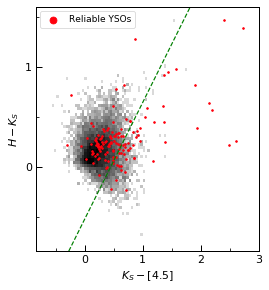

In [26]:
#1a
#Defining the x and y axes
x_ax = data['Kmag'][idx_HKK45]-data['k45mag'][idx_HKK45]
y_ax= data['Hmag'][idx_HKK45]-data['Kmag'][idx_HKK45]

#Defining the edges of the 2D histogram for the Hess diagram  - makesure this matches your plot imits or is just smaller than
x_edges = np.linspace(-4, 4, 200) #(min, max, nbins)
y_edges = np.linspace(-2, 4, 200)
extent = [x_edges[0], x_edges[-1], y_edges[-1], y_edges[0]]

plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=11)
plt.rc("ytick", labelsize=11)
plt.rc("axes", labelsize=11)
plt.rc("legend", fontsize=11)
# plt.rcdefaults()                    # Resets the parameters to their default values

#2D histogram
numH = np.histogram2d(y_ax,x_ax,bins=(y_edges, x_edges))
numH[0][numH[0] == 0] = np.nan
numH=np.log10(numH[0])*0.75          #logging it to show features, but you can use any stretch you like.

#Setting up figure, 6"x5" in this case
fig = plt.figure(figsize=(4,4.5))

plt.clf()      #clears plot area
ax = plt.gca() #sets up active plot region

#Set up plot window: limits, titles, etc. Note the "ax" that was defined earlier.
plt.setp(ax,xlim=[-0.85,3],
         ylim=[-0.85,1.6],
         xlabel='$K_S - [4.5]$',
         ylabel='$H - K_S$')

x_majors=[-3,-2,-1,0,1,2,3,4]
y_majors=[-1,0,1,2,3]
ax.xaxis.set_major_locator(matplotlib.ticker.FixedLocator(x_majors))
ax.yaxis.set_major_locator(matplotlib.ticker.FixedLocator(y_majors))
x_minors = np.linspace(-2, 5, 15)[1:-1]
ax.xaxis.set_minor_locator(matplotlib.ticker.FixedLocator(x_minors))
y_minors = np.linspace(-2, 5, 15)[1:-1]
ax.yaxis.set_minor_locator(matplotlib.ticker.FixedLocator(y_minors))
plt.tick_params(which='minor',direction='in',length=3)
plt.tick_params(which='major',direction='in',length=6)

#Show the image (the 2D histogram)
im = ax.imshow(numH,extent=extent,interpolation='nearest',
            vmin=0,vmax=1000,aspect='auto')

im.set_clim(0,1.5)         #clipping values of the image to show.
im.set_cmap('gist_yarg')   #choosing a color map

#Plot all potential YSOs making the cut
#plt.scatter(data['k36mag'][c9_idx]-data['k80mag'][c9_idx], data['k80mag'][c9_idx], s=0.9,color=sns.xkcd_rgb['bright purple'], label="YSO candidates")
# Plot all reliable stars which satify the cut criteria
plt.scatter(reliable_score_cat['Kmag'][rel_idx_HKK45]-reliable_score_cat['k45mag'][rel_idx_HKK45], reliable_score_cat['Hmag'][rel_idx_HKK45]-reliable_score_cat['Kmag'][rel_idx_HKK45], s=3,color=sns.xkcd_rgb['bright red'], label="Reliable YSOs")

#reliable_cat.show_in_browser(jsviewer=True)

lines=([-2,4],[-2.8588,4.1456])
lim=int(0.5*len(lines))
for i in range(lim):
    x,y=lines[2*i],lines[2*i+1]
    plt.plot(x,y,'--',color='green',linewidth=1.2)

# Add a legend
plt.legend(loc="upper left",frameon=True, scatterpoints=1, numpoints=1, markerscale=4,fontsize=9)
plt.savefig("H_K_K_45_Hess.pdf", bbox_inches='tight')

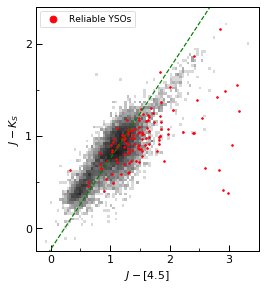

In [28]:
#1b
#Defining the x and y axes
x_ax = data['Jmag'][idx_JKJ45]-data['k45mag'][idx_JKJ45]
y_ax= data['Jmag'][idx_JKJ45]-data['Kmag'][idx_JKJ45]

#Defining the edges of the 2D histogram for the Hess diagram  - makesure this matches your plot imits or is just smaller than
x_edges = np.linspace(-4, 4, 200) #(min, max, nbins)
y_edges = np.linspace(-2, 4, 200)
extent = [x_edges[0], x_edges[-1], y_edges[-1], y_edges[0]]

plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=11)
plt.rc("ytick", labelsize=11)
plt.rc("axes", labelsize=11)
plt.rc("legend", fontsize=11)
# plt.rcdefaults()                    # Resets the parameters to their default values

#2D histogram
numH = np.histogram2d(y_ax,x_ax,bins=(y_edges, x_edges))
numH[0][numH[0] == 0] = np.nan
numH=np.log10(numH[0])*0.75          #logging it to show features, but you can use any stretch you like.

#Setting up figure, 6"x5" in this case
fig = plt.figure(figsize=(4,4.5))

plt.clf()      #clears plot area
ax = plt.gca() #sets up active plot region

#Set up plot window: limits, titles, etc. Note the "ax" that was defined earlier.
plt.setp(ax,xlim=[-0.25,3.5],
         ylim=[-0.25,2.4],
         xlabel='$J - [4.5]$',
         ylabel='$J - K_S$')

x_majors=[-3,-2,-1,0,1,2,3,4]
y_majors=[-1,0,1,2,3]
ax.xaxis.set_major_locator(matplotlib.ticker.FixedLocator(x_majors))
ax.yaxis.set_major_locator(matplotlib.ticker.FixedLocator(y_majors))
x_minors = np.linspace(-2, 5, 15)[1:-1]
ax.xaxis.set_minor_locator(matplotlib.ticker.FixedLocator(x_minors))
y_minors = np.linspace(-2, 5, 15)[1:-1]
ax.yaxis.set_minor_locator(matplotlib.ticker.FixedLocator(y_minors))
plt.tick_params(which='minor',direction='in',length=3)
plt.tick_params(which='major',direction='in',length=6)

#Show the image (the 2D histogram)
im = ax.imshow(numH,extent=extent,interpolation='nearest',
            vmin=0,vmax=1000,aspect='auto')

im.set_clim(0,1.5)         #clipping values of the image to show.
im.set_cmap('gist_yarg')   #choosing a color map

#Plot all potential YSOs making the cut
#plt.scatter(data['k36mag'][c9_idx]-data['k80mag'][c9_idx], data['k80mag'][c9_idx], s=0.9,color=sns.xkcd_rgb['bright purple'], label="YSO candidates")
# Plot all reliable stars which satify the cut criteria
plt.scatter(reliable_score_cat['Jmag'][rel_idx_JKJ45]-reliable_score_cat['k45mag'][rel_idx_JKJ45], reliable_score_cat['Jmag'][rel_idx_JKJ45]-reliable_score_cat['Kmag'][rel_idx_JKJ45], s=3,color=sns.xkcd_rgb['bright red'], label="Reliable YSOs")

#reliable_cat.show_in_browser(jsviewer=True)

lines=([-10,10],[-10.04196,9.5804])
lim=int(0.5*len(lines))
for i in range(lim):
    x,y=lines[2*i],lines[2*i+1]
    plt.plot(x,y,'--',color='green',linewidth=1.2)

# Add a legend
plt.legend(loc="upper left",frameon=True, scatterpoints=1, numpoints=1, markerscale=4,fontsize=9)
plt.savefig("J_K_J_45_Hess.pdf", bbox_inches='tight')

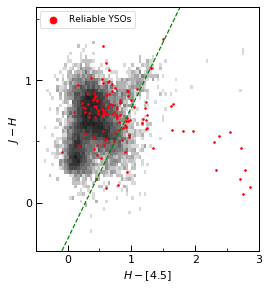

In [31]:
#1c
#Defining the x and y axes
x_ax = data['Hmag'][idx_JHH45]-data['k45mag'][idx_JHH45]
y_ax= data['Jmag'][idx_JHH45]-data['Hmag'][idx_JHH45]

#Defining the edges of the 2D histogram for the Hess diagram  - makesure this matches your plot imits or is just smaller than
x_edges = np.linspace(-4, 4, 200) #(min, max, nbins)
y_edges = np.linspace(-2, 4, 200)
extent = [x_edges[0], x_edges[-1], y_edges[-1], y_edges[0]]

plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=11)
plt.rc("ytick", labelsize=11)
plt.rc("axes", labelsize=11)
plt.rc("legend", fontsize=11)
# plt.rcdefaults()                    # Resets the parameters to their default values

#2D histogram
numH = np.histogram2d(y_ax,x_ax,bins=(y_edges, x_edges))
numH[0][numH[0] == 0] = np.nan
numH=np.log10(numH[0])*0.75          #logging it to show features, but you can use any stretch you like.

#Setting up figure, 6"x5" in this case
fig = plt.figure(figsize=(4,4.5))

plt.clf()      #clears plot area
ax = plt.gca() #sets up active plot region

#Set up plot window: limits, titles, etc. Note the "ax" that was defined earlier.
plt.setp(ax,xlim=[-0.5,3.0],
         ylim=[-0.4,1.6],
         xlabel='$H - [4.5]$',
         ylabel='$J - H$')

x_majors=[-3,-2,-1,0,1,2,3,4]
y_majors=[-1,0,1,2,3]
ax.xaxis.set_major_locator(matplotlib.ticker.FixedLocator(x_majors))
ax.yaxis.set_major_locator(matplotlib.ticker.FixedLocator(y_majors))
x_minors = np.linspace(-2, 5, 15)[1:-1]
ax.xaxis.set_minor_locator(matplotlib.ticker.FixedLocator(x_minors))
y_minors = np.linspace(-2, 5, 15)[1:-1]
ax.yaxis.set_minor_locator(matplotlib.ticker.FixedLocator(y_minors))
plt.tick_params(which='minor',direction='in',length=3)
plt.tick_params(which='major',direction='in',length=6)

#Show the image (the 2D histogram)
im = ax.imshow(numH,extent=extent,interpolation='nearest',
            vmin=0,vmax=1000,aspect='auto')

im.set_clim(0,1.5)         #clipping values of the image to show.
im.set_cmap('gist_yarg')   #choosing a color map

#Plot all potential YSOs making the cut
#plt.scatter(data['k36mag'][c9_idx]-data['k80mag'][c9_idx], data['k80mag'][c9_idx], s=0.9,color=sns.xkcd_rgb['bright purple'], label="YSO candidates")
# Plot all reliable stars which satify the cut criteria
plt.scatter(reliable_score_cat['Hmag'][rel_idx_JHH45]-reliable_score_cat['k45mag'][rel_idx_JHH45], reliable_score_cat['Jmag'][rel_idx_JHH45]-reliable_score_cat['Hmag'][rel_idx_JHH45], s=3,color=sns.xkcd_rgb['bright red'], label="Reliable YSOs")

#reliable_cat.show_in_browser(jsviewer=True)

lines=([-10,10],[-11.0577,10.4583])
lim=int(0.5*len(lines))
for i in range(lim):
    x,y=lines[2*i],lines[2*i+1]
    plt.plot(x,y,'--',color='green',linewidth=1.2)

# Add a legend
plt.legend(loc="upper left",frameon=True, scatterpoints=1, numpoints=1, markerscale=4,fontsize=9)
plt.savefig("J_H_H_45_Hess.pdf", bbox_inches='tight')

In [47]:
#sort the reliable YSO catalogue by RA and then Dec and write it to csv file
#note that the ID numbers are not consecutive - edit this in the file 'manually'
reliable_score_cat.sort(['RA', 'Dec'])
ascii.write(reliable_score_cat[['ID','RA','Dec']], 'NGC6822_YSO_RADec.csv', format='csv', fast_writer=False)